# Predicting Myocardial Infarction

#### Andrew Merz

#### Problem Statement
A heart attack (myocardial infarction) occurs when one of the heart’s coronary arteries is blocked or has its flow dramatically reduced.  Heart attacks frequently occur as a part of heart disease, which causes the greatest number of deaths each year in the US.  Given the significant risk of death or serious heart damage from a myocardial infarction, predicting the incidence of such event could be highly useful for purposes of prevention.  For this project, 3 models, a logistic regression model, an artificial neural network (ANN), and a gradient boosting machine (GBM), were trained on data from the Health and Retirement Survey (HRS) to predict the incidence of myocardial infarction over a 6-year period (2010-2016).

#### Data Set
This project utilized data from the Health and Retirement Survey (HRS), a longitudinal panel study with a representative sample of approximately 20,000 people in the United States.  This survey looks primarily at adults ages 50+ to understand changes in lifestyle, finances, and health as Americans age.  The study is supported by the National Institute on Aging and the Social Security Administration.  The first set of respondents was surveyed in 1992 and have been re-interviewed every 2 years since.  Periodically, additional respondents from new generations are added to the survey to replenish the sample size and maintain a representational sample.  For this project, I utilized the data from the 2010 core survey as the baseline, and used responses to surveys from 2012-2016 to determine whether the respondents suffered a myocardial infarction during the 2010-2016 timespan.  

#### Overview
Steps to complete this project:
1. [Install Python using the Anaconda package manager](#section1)
2. [Install required Python packages](#section2)
3. [Download HRS data](#section3)
4. [Read data into Python](#section4)
5. [Create response variable (to be predicted)](#section5)
6. [Filter data](#section6)
7. [Select predictor variables](#section7)
8. [Recode predictor variables for exploratory data analysis](#section8)
9. [Split data into training and test sets](#section9)
10. [Perform exploratory data analysis](#section10)
11. [Recode predictor variables for use in modeling](#section11)
12. [Impute missing predictor data](#section12)
13. [Rescale data](#section13)
14. [Process test data](#section14)
15. [Determine baseline performance benchmark](#section15)
16. [Define model performance metrics](#section16)
17. [Fit the logistic regression model](#section17)
18. [Select a neural network model](#section18)
19. [Select a gradient boosting machine model](#section19)
20. [Test the selected models using the test set](#section20)

## Detailed Explanation of Each Step

<a id="section1"></a>

**1. Install Python using the Anaconda package manager**
- Install Python version 3.6.8 using the Anaconda package manager
- Navigate to https://docs.anaconda.com/anaconda/install/ and follow the instructions to install for your operating system

<a id="section2"></a>

**2. Install required Python packages**
- Install required packages using the Anaconda package manager:  see https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html for instructions
- The following Python libraries were used for this project:
    - Pandas (version 0.24.1)
    - NumPy (1.16.2)
    - MatPlotLib (3.0.2)
    - Seaborn (0.9.0)
    - StatsModels (0.9.0) (logistic regression)
    - Scikit-Learn (0.20.2)
    - Keras, with TensorFlow backend (2.2.4) (neural networks)
    - copy (to avoid altering the original source data)
    - re (regular expressions)

In [62]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import copy
import re
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from keras import optimizers
from sklearn.model_selection import GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import regularizers
from keras import backend as K

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

<a id="section3"></a>

**3. Download HRS Data**
- This survey only utilized HRS data that was publicly available
- Publicly available HRS data can be downloaded from https://hrs.isr.umich.edu/data-products/access-to-public-data?_ga=2.165507391.1078637040.1557700423-150374021.1556499097 
    - Also see http://hrsonline.isr.umich.edu/index.php?p=avail&_ga=2.86391320.1078637040.1557700423-150374021.1556499097 for a list of datasets publicly available for download
- In order to download data, the user must create an account and login
    - No payment or special access is necessary—anyone can create an account and download the publicly-available data
- An overview of the HRS survey methodology can be found at https://hrs.isr.umich.edu/sites/default/files/biblio/OverviewofHRSPublicData.pdf
- Codebooks for HRS surveys can be found at https://hrs.isr.umich.edu/documentation/codebooks
- The following HRS data files were downloaded for this project:
    - 2006 Core:  h06da.zip, h06sas.zip
    - 2008 Core:  h08da.zip, h08sas.zip
    - 2010 Core:  h10da.zip, h10sas.zip
    - 2012 Core:  h12da.zip, h12sas.zip
    - 2012 Exit:  x12da.zip, x12sas.zip
    - 2014 Core:  h14da.zip, h14sas.zip
    - 2014 Exit:  x14da.zip, x14sas.zip
    - 2016 Core:  h16da.zip, h16sas.zip
    - 2016 Exit:  x16da.zip, x16sas.zip
    - 2016 Cross-Wave Tracker:  trk2016.zip
- Each of these data folders were unzipped and saved in a directory named `Data`

<a id="section4"></a>

**4. Read the data into Python**
- Data from the following files was used in this analysis:
    - 2006 Core Physical Health:  H06C_R.da
    - 2006 Core Physical Measures:  H06I_R.da
    - 2008 Core Physical Health:  H08C_R.da
    - 2008 Core Physical Measures:  H08I_R.da
    - 2010 Core Physical Health:  H10C_R.da
    - 2010 Core Physical Measures:  H10I_R.da 
    - 2010 Core Demographics:  H10B_R.da
    - 2010 Core Health Services and Insurance:  H10N_R.da
    - 2012 Core Physical Health:  H12C_R.da
    - 2012 Exit Physical Measures:  X12C_R.da
    - 2014 Core Physical Health:  H14C_R.da
    - 2014 Exit Physical Measures:  X14C_R.da
    - 2016 Core Physical Health:  H16C_R.da
    - 2016 Exit Physical Measures:  X16C_R.da
    - 2016 Cross Wave Tracker:  TRK2016TR_R.da
- The downloaded data was only available in SAS, Stata, and SPSS-readable formats
- Fortunately, the downloadable data and SAS configuration files were in plain text
- Therefore, it was possible to write a parser to read the data using the information contained in the SAS configuration files
- The column names and data ranges were copied from the SAS configuration files into text files with the same name in a `Column Headers` folder
- All "$" characters were manually removed from these copied header lists
- A set of parsing functions (`get_headers` and `read_data`) were then used to read each data file and convert it into a Pandas DataFrame

In [2]:
# Retrieve the headers and the indices of their values in the data files
def get_headers(file):
    with open('Column Headers/' + file + '.txt') as headers_file:
        headers_data = headers_file.read()
        headers_data = headers_data.split("\n")
        headers_data.remove('')
        output = []
        for row in headers_data:
            header_name, indices = row.split('  ')
            start, stop = indices.split(' - ')
            output.append({'header_name': header_name, 'start': int(start), 'stop': int(stop)})
        return output

# Read the .da data files and extract the correct data for each column (using the column header data)
def read_data(directory, file):
    header_data = get_headers(file)
    output_data = []
    with open('Data/' + directory + '/' + file + '.da') as data_file:
        data = data_file.read().split("\n")
        data.remove('')
        for r in data:
            row_data = {}
            for hr in header_data:
                row_data[hr['header_name']] = r[hr['start'] - 1:hr['stop']]
            output_data.append(row_data)
    return pd.DataFrame(output_data)

<a id="section5"></a>

**5. Create the response variable**
- The response (outcome) variable is whether a given 2010 respondent would have a heart attack (myocardial infarction) between their 2010 response and their 2016 response
- To ascertain whether a heart attack occurred within the 2010-2016 timeframe, data must be pieced together from the Physical Health files for the 2012-2016 core and exit surveys
    - The core files were for respondents that were still alive at the time of the survey; the exit files were for those who had died since the last survey wave (follow-up/closeout with the person’s next of kin)
    - In all of these files, respondents (or their next of kin) were asked whether the respondent had a heart attack and when their most recent heart attack occurred
- Responses from these 6 files were combined to determine whether a respondent had a heart attack 2010-2016
- NOTE:  the methodology used is not perfectly comprehensive given the survey structure—it is a possible there were a few respondents whose heart attack was not captured due to nonresponse in a particular year.  This is a limitation of the dataset that must be accepted.

<a id="section6"></a>

**6. Filter the data**
- The data was filtered to exclude 708 participants for which no follow-up after 2010 occurred (whether as a regular or exit survey)
- Additionally, 950 respondents under the age of 50 were excluded
    - There was a wide variety of ages in the group under 50 (including people as young as 18)—these were excluded due to the concern that variable correlation patterns may be different in this younger age group and the sample size was not large enough to satisfactorily account for these differences (the proportion of respondents in these age groups is highly non-representative)
- After filtering, the sample size dropped from 22,034 to a final size of 20,376 respondents

In [3]:
# Read the data for the baseline year (2010)
df = read_data(directory='h10da', file='H10C_R')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22034 entries, 0 to 22033
Columns: 252 entries, HHID to PN
dtypes: object(252)
memory usage: 42.4+ MB
None


,HHID,LSUBHH,MC001,MC002,MC005,MC006,MC008,MC009,MC010,MC011,...,MC276,MC277,MCSR,MFAMR,MFINR,MPN_SP,MSUBHH,MVDATE,MVERSION,PN
0,000003,0,3,3,5,,,,5,,...,,,5,5,1,020,0,7,5.1,010
1,000003,0,4,3,5,,,,5,,...,,,1,1,5,010,0,7,5.1,020
2,010001,0,3,2,5,,,,5,,...,,,1,1,1,011,0,7,5.1,010
3,010003,0,3,1,1,1,1,1,5,,...,,,1,1,1,,0,2,5.1,030
4,010004,0,4,2,1,1,1,2,5,,...,,,1,5,1,040,0,5,5.1,010


In [4]:
# Read the tracker file data
trk = read_data(directory='trk2016', file='TRK2016TR_R')
print(trk.info())
trk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43222 entries, 0 to 43221
Columns: 469 entries, AAGE to YRENTER
dtypes: object(469)
memory usage: 154.7+ MB
None


,AAGE,AALIVE,ACOUPID,ACOUPLE,ADAMS1,AFAMR,AFINR,AINSAMP,AIWLANG,AIWMODE,...,VA13,VBS16COMPLETE,VBS16CONSENT,VBS16ELIG,VBS16SELECT,VBS16SUBELIG,VBS16VALID,VERSION,WTCOHORT,YRENTER
0,054,1,010000,5,99,1,1,1,1,1,...,99,,,,,,,2,041,1992
1,057,1,010000,5,99,1,1,1,1,1,...,99,,,,,,,2,036,1992
2,056,1,010020,1,99,5,1,1,1,1,...,99,,,0,1,,,2,036,1992
3,054,1,010020,1,99,1,5,1,1,1,...,99,,,0,1,,,2,041,1992
4,053,1,010000,5,99,1,1,1,1,1,...,99,,0,1,1,,,2,041,1992


In [5]:
# Join the tracker file data to the 2010 wave data
df = df.merge(trk, on=['HHID', 'PN'], how='left')
print(df.shape)

(22034, 719)


In [6]:
# Iterate over each survey and exit survey since 2010 and check whether they had a heart attack since the last survey
# Print file specs while merging
data_file_maps = {
    'h12da': 'H12C_R', 'x12da': 'X12C_R', 
    'h14da': 'H14C_R', 'x14da': 'X14C_R', 
    'h16da': 'H16C_R', 'x16da': 'X16C_R'
}
C040_cols = []
C257_cols = []
C258_cols = []
C259_cols = []
for directory, file in data_file_maps.items():
    d = read_data(directory, file)
    print('directory:', directory)
    print('file:', file)
    print('N:', d.shape)
    C040 = [col for col in d.columns if 'C040' in col] # heart attack indicator contains string 'C040'
    print('C040 cols:', C040)
    C040_cols += C040
    C257 = [col for col in d.columns if 'C257' in col] # heart attack indicator contains string 'C257'
    print('C257 cols:', C257)
    C257_cols += C257
    C258 = [col for col in d.columns if 'C258' in col] # heart attack indicator contains string 'C258'
    print('C258 cols:', C258)
    C258_cols += C258
    C259 = [col for col in d.columns if 'C259' in col] # heart attack indicator contains string 'C259'
    print('C259 cols:', C259)
    C259_cols += C259
    d = d[['HHID', 'PN'] + C040 + C257 + C258 + C259]
    print(d.shape)
    df = df.merge(d, how='left', on=['HHID', 'PN'])
    print(df.shape)
    print('-' * 50)

directory: h12da
file: H12C_R
N: (20554, 250)
C040 cols: ['NC040']
C257 cols: ['NC257']
C258 cols: ['NC258']
C259 cols: ['NC259']
(20554, 6)
(22034, 723)
--------------------------------------------------
directory: x12da
file: X12C_R
N: (1187, 84)
C040 cols: ['XC040']
C257 cols: ['XC257']
C258 cols: ['XC258']
C259 cols: ['XC259']
(1187, 6)
(22034, 727)
--------------------------------------------------
directory: h14da
file: H14C_R
N: (18747, 227)
C040 cols: ['OC040']
C257 cols: ['OC257']
C258 cols: ['OC258']
C259 cols: ['OC259']
(18747, 6)
(22034, 731)
--------------------------------------------------
directory: x14da
file: X14C_R
N: (1242, 81)
C040 cols: ['YC040']
C257 cols: ['YC257']
C258 cols: ['YC258']
C259 cols: ['YC259']
(1242, 6)
(22034, 735)
--------------------------------------------------
directory: h16da
file: H16C_R
N: (20918, 240)
C040 cols: ['PC040']
C257 cols: ['PC257']
C258 cols: ['PC258']
C259 cols: ['PC259']
(20918, 6)
(22034, 739)
--------------------------------

In [7]:
# View the distribution of heart attack indicators across each survey wave
for i in range(len(C040_cols)):
    print(C040_cols[i])
    print(C257_cols[i])
    d = df.groupby([C040_cols[i], C257_cols[i]])[['HHID']].count().reset_index()
    print(pd.pivot_table(d, values='HHID', index=C040_cols[i], columns=C257_cols[i], aggfunc='sum'))
    print('-' * 50)

NC040
NC257
NC257               1       5     8
NC040                              
       15118.0  297.0  2638.0  66.0
1         79.0   92.0     NaN   NaN
5        535.0  943.0     NaN   NaN
8          3.0   10.0     NaN   NaN
--------------------------------------------------
XC040
XC257
XC257             1      5     8
XC040                           
       480.0   37.0  281.0  23.0
1       10.0   45.0    NaN   NaN
5       19.0  108.0    NaN   NaN
8        NaN    2.0    NaN   NaN
--------------------------------------------------
OC040
OC257
OC257               1       5     8
OC040                              
       13471.0  287.0  2458.0  53.0
1         96.0   84.0     NaN   NaN
5        571.0  812.0     NaN   NaN
8         15.0    7.0     NaN  20.0
--------------------------------------------------
YC040
YC257
YC257             1      5     8
YC040                           
       554.0   56.0  327.0  30.0
1        9.0   36.0    NaN   NaN
5       18.0  128.0    NaN   NaN
8   

In [8]:
# Check how many patients weren't followed up in ANY of the surveys after 2010 (including exit surveys)
(df[C040_cols + C257_cols + C258_cols + C259_cols].isnull().sum(axis=1) == len(C040_cols + C257_cols + C258_cols + C259_cols)).value_counts(dropna=False)

False    21326
True       708
dtype: int64

In [9]:
# Exclude the respondents that were never followed up with after the 2010 wave (in neither the regular or exit surveys)
print(len(df))
df = df[~(df[C040_cols + C257_cols + C258_cols + C259_cols].isnull().sum(axis=1) == len(C040_cols + C257_cols + C258_cols + C259_cols))]
print(len(df))

22034
21326


In [10]:
# Create response variable (version 1)
num_reg = re.compile('\d+')
MI_outcomes = []
for r in df.to_dict('records'):
    MI = 'No heart attack'
    for i in range(len(C040_cols)):
        if r[C040_cols[i]] == '1':
            MI = 'Heart attack (case 1)'
            break
        elif num_reg.fullmatch(str(r[C258_cols[i]])) and (r[C258_cols[i]] not in ['9998', '9999']) and num_reg.fullmatch(str(r[C259_cols[i]])) and (r[C259_cols[i]] not in ['98', '99']):
            if r[C257_cols[i]] == '1' and int(r[C258_cols[i]]) > 2010 or (int(r[C258_cols[i]]) == 2010 and int(r[C259_cols[i]]) > int(r['MIWMONTH'])):
                MI = 'Heart Attack (case 2)'
                break
    MI_outcomes.append(MI)
    
df['heart_attack_semifinal'] = MI_outcomes
print(df['heart_attack_semifinal'].value_counts(dropna=False))

No heart attack          20266
Heart attack (case 1)      721
Heart Attack (case 2)      339
Name: heart_attack_semifinal, dtype: int64


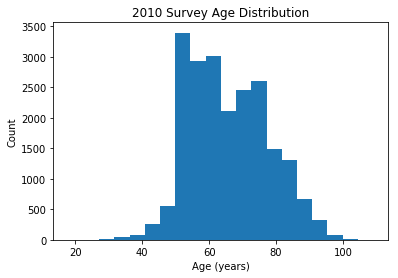

True     20376
False      950
Name: 2010_age, dtype: int64


In [11]:
# Perform initial visualization of demographic variable distributions
df['gender'] = df['GENDER'].map({'1': 'male', '2': 'female', '': None})
df['hispanic'] = df['HISPANIC'].map({'0': None, '1': 'hispanic', '2': 'hispanic', '3': 'hispanic', '5': 'non-hispanic'})
df['race'] = df['RACE'].map({'0': None, '1': 'white', '2': 'black', '7': 'other'})
df['2010_age'] = pd.to_numeric(df['MAGE'])

plt.hist(df['2010_age'], bins=20)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('2010 Survey Age Distribution')
plt.show()
print((df['2010_age'] >= 50).value_counts(dropna=False))

In [12]:
# Filter by age
# Due to the rather small, non-representative number of people under the age of 50, I will exclude everyone under 50
print(len(df))
df = df[df['2010_age'] >= 50]
print(len(df))
print(df['heart_attack_semifinal'].value_counts(dropna=False))

21326
20376
No heart attack          19334
Heart attack (case 1)      705
Heart Attack (case 2)      337
Name: heart_attack_semifinal, dtype: int64


In [13]:
# Create the final heart attack outcome variable:  0 if no heart attack, 1 if heart attack within the 6-year window
df['heart_attack'] = df['heart_attack_semifinal'].map({'No heart attack': 0, 'Heart attack (case 1)': 1, 'Heart Attack (case 2)': 1})
df['heart_attack'].value_counts(dropna=False)

0    19334
1     1042
Name: heart_attack, dtype: int64

<a id="section7"></a>

**7. Select the predictor variables**
- Initial predictor variables were selected by the following categories:
    - **Established heart attack risk factors**:
        - Age
        - Tobacco use
        - High blood pressure
        - High blood cholesterol (particularly LDL and triglycerides)
        - Obesity (BMI >= 30)
        - Angina (chest pain)
        - Diabetes/high blood sugar
        - Metabolic syndrome:  high blood pressure + obesity + high blood sugar (i.e., diabetes)
        - Lack of physical activity
        - Stress
        - Autoimmune condition
    - **Demographics (not all of these were assumed to be correlated with heart disease)**:
        - Gender
        - Race
        - Hispanic ethnicity
        - Years of education
        - Marital status
        - Living status (alone, with family, with non-family, etc.)
        - Frequency of attendance of religious services
    - **Additional health-related variables (selected out of curiosity)**:
        - Height
        - Weight
        - Cancer:  might weaken a person and predispose them to heart disease
        - Lung disease:  same as cancer; also, might be a result of tobacco use, which predisposes one to a heart attack
        - Arthritis:  might indicate an autoimmune condition, which predisposes to heart disease; might also limit physical activity, further enhancing risk
        - Incontinence
        - Alcohol consumption:  common wisdom holds that alcohol consumption reduces heart attack risk
        - Days spent in bed in the past month:  indicates reduced physical activity and poor health, risk factors for heart attack
        - Depression:  indicator for mental health issues and isolation which may increase stress and risk of heart attack

Some of these variables relied on data from outside of the 2010 health measures file--either other 2010 files or files from previous survey waves.  This data is merged into the main data frame using the `join_external_data` function.

In [14]:
# Merge in necessary reference data from external files
def join_external_data(df):
    
    output = df[:]
    
    pm = read_data(directory='h10da', file='H10I_R')
    print(pm.shape)
    print(output.shape)
    output = output.merge(pm[['HHID', 'PN', 'MI834', 'MI841']], how='left', on=['HHID', 'PN'])
    print(output.shape)
    
    print('-' * 50)
    pm08 = read_data(directory='h08da', file='H08I_R')
    print(pm08.shape)
    print(output.shape)
    output = output.merge(pm08[['HHID', 'PN', 'LI834', 'LI841']], how='left', on=['HHID', 'PN'])
    print(output.shape)
    
    print('-' * 50)
    pm06 = read_data(directory='h06da', file='H06I_R')
    print(pm06.shape)
    print(output.shape)
    output = output.merge(pm06[['HHID', 'PN', 'KI834', 'KI841']], how='left', on=['HHID', 'PN'])
    print(output.shape)
    
    print('-' * 50)
    d08 = read_data(directory='h08da', file='H08C_R')
    print(d08.shape)
    print(output.shape)
    output = output.merge(d08[['HHID', 'PN', 'LC141', 'LC142', 'LC139', 'LC040', 'LC045']], how='left', on=['HHID', 'PN'])
    print(output.shape)
    
    print('-' * 50)
    d06 = read_data(directory='h06da', file='H06C_R')
    print(d06.shape)
    print(output.shape)
    output = output.merge(d06[['HHID', 'PN', 'KC141', 'KC142', 'KC139', 'KC040', 'KC045']], how='left', on=['HHID', 'PN'])
    print(output.shape)

    print('-' * 50)
    b06 = read_data(directory='h10da', file='H10B_R')
    print(b06.shape)
    print(output.shape)
    output = output.merge(b06[['HHID', 'PN', 'MB082']], how='left', on=['HHID', 'PN'])
    print(output.shape)

    print('-' * 50)
    n06 = read_data(directory='h10da', file='H10N_R')
    print(n06.shape)
    print(output.shape)
    output = output.merge(n06[['HHID', 'PN', 'MN360', 'MN365']], how='left', on=['HHID', 'PN'])
    print(output.shape)

    return output

df2 = join_external_data(df)

(22034, 187)
(20376, 749)
(20376, 751)
--------------------------------------------------
(17217, 186)
(20376, 751)
(20376, 753)
--------------------------------------------------
(18469, 180)
(20376, 753)
(20376, 755)
--------------------------------------------------
(17217, 229)
(20376, 755)
(20376, 760)
--------------------------------------------------
(18469, 208)
(20376, 760)
(20376, 765)
--------------------------------------------------
(22034, 184)
(20376, 765)
(20376, 766)
--------------------------------------------------
(22034, 345)
(20376, 766)
(20376, 768)


<a id="section8"></a>

**8. Recode predictor variables for exploratory data analysis**
- The initially-chosen predictor variables were recoded so exploratory data analysis could be easily performed
- This involved converting the numeric response codes into text strings descriptive of the categories the codes represented
- Performed by the `select_and_recode` function

In [15]:
# Returns new dataset with response variable and recoded predictor variables
# "Don't know" and "Refused" responses are recoded as NaN
def select_and_recode(df):
    output = df[['heart_attack']]
    
    # Demographic variables
    output['gender'] = df['GENDER'].map({'1': 'male', '2': 'female', '': None})
    output['hispanic'] = df['HISPANIC'].map({'0': None, '1': 'hispanic', '2': 'hispanic', '3': 'hispanic', '5': 'non-hispanic'})
    output['race'] = df['RACE'].map({'0': None, '1': 'white', '2': 'black', '7': 'other'})
    output['age'] = pd.to_numeric(df['MAGE'])
    output['school_yrs'] = [int(v) if v != '99' else None for v in df['SCHLYRS']]
    output['marital_status'] = df['MMARST'].map({'1': 'married', '2': 'separated/divorced', '3': 'widowed', '4': 'never married', '5': None})
    liv_stat_map = {
        '1': 'mop, lwp', #'Married or partnered, living with partner',
        '2': 'mop, nwlp', #'Married or partnered, not living with spouse/partner',
        '3': 'nmop, lwua', #'Not married or partnered, living with other unrelated adult',
        '4': 'nmop, lwr', #'Not married or partnered, living with relative (including minor children), or unrelated minor child',
        '5': 'nmop, la', #'Not married or partnered, living alone',
        '6': None
    }
    output['living_status'] = df['MLIVARR'].map(liv_stat_map)
    attend_freq_map = {
        '1': 'more than once a week',
        '2': 'once a week',
        '3': 'two or three times a month',
        '4': 'one or more times a year',
        '5': 'not at all',
        '8': None,
        '9': None
    }
    output['attend_freq'] = df['MB082'].map(attend_freq_map)
    
    
    BP_map = {
        '1': 'high', 
        '3': 'high', 
        '4': 'not high', 
        '5': 'not high'
    }
    output['blood_pressure'] = df['MC005'].map(BP_map)
    
    # Compute BMI = kg/m**2
    output['height_sr10_ft'] = [int(v) if v not in ['', '8', '9'] else None for v in df['MC141'].str.replace('\s+', '')]
    output['height_sr10_in'] = [float(v) if v not in ['', '99998.00', '99999.00'] else None for v in df['MC142'].str.replace('\s+', '')]
    output['height_sr10'] = output['height_sr10_ft'] * 12 + output['height_sr10_in']
    output['height_sr08_ft'] = [int(v) if v not in ['', '8', '9'] else None for v in df['LC141'].str.replace('\s+', '').fillna('')]
    output['height_sr08_in'] = [float(v) if v not in ['', '99998.00', '99999.00'] else None for v in df['LC142'].str.replace('\s+', '').fillna('')]
    output['height_sr08'] = output['height_sr08_ft'] * 12 + output['height_sr08_in']
    output['height_sr06_ft'] = [int(v) if v not in ['', '8', '9'] else None for v in df['KC141'].str.replace('\s+', '').fillna('')]
    output['height_sr06_in'] = [float(v) if v not in ['', '99998.00', '99999.00'] else None for v in df['KC142'].str.replace('\s+', '').fillna('')]
    output['height_sr06'] = output['height_sr06_ft'] * 12 + output['height_sr06_in']
    
    output['height_m10'] = pd.Series([float(v) if v not in ['', '99998.00', '99999.00'] else None for v in df['MI834'].str.replace('\s+', '').fillna('')])
    output['height_m08'] = pd.Series([float(v) if v not in ['', '99998.00', '99999.00'] else None for v in df['LI834'].str.replace('\s+', '').fillna('')])
    output['height_m06'] = pd.Series([float(v) if v not in ['', '99998.00', '99999.00'] else None for v in df['KI834'].str.replace('\s+', '').fillna('')])

    height_in = []
    height_source = []
    for r in output.to_dict('records'):
        if str(r['height_m10']) != 'nan' and r['height_m10'] <= 96 and r['height_m10'] >= 36:
            height_in.append(r['height_m10'])
            height_source.append('2010 Measured')
        elif str(r['height_m08']) != 'nan' and r['height_m08'] <= 96 and r['height_m08'] >= 36:
            height_in.append(r['height_m08'])
            height_source.append('2008 Measured')
        elif str(r['height_m06']) != 'nan' and r['height_m06'] <= 96 and r['height_m06'] >= 36:
            height_in.append(r['height_m06'])
            height_source.append('2006 Measured')
        elif str(r['height_sr10']) != 'nan' and r['height_sr10'] <= 96 and r['height_sr10'] >= 36:
            height_in.append(r['height_sr10'])
            height_source.append('2010 Self-Report')
        elif str(r['height_sr08']) != 'nan' and r['height_sr08'] <= 96 and r['height_sr08'] >= 36:
            height_in.append(r['height_sr08'])
            height_source.append('2008 Self-Report')
        elif str(r['height_sr06']) != 'nan' and r['height_sr06'] <= 96 and r['height_sr06'] >= 36:
            height_in.append(r['height_sr06'])
            height_source.append('2006 Self-Report')
        else:
            height_in.append(None)
            height_source.append(None)

    output['height_in'] = height_in
    output['height_source'] = height_source
    output['weight_lbs'] = [int(v) if v not in ['', '998', '999'] else None for v in df['MC139'].str.replace('\s+', '')]
    output['bmi'] = 0.453592 * output['weight_lbs'] / (output['height_in'] * 0.0254)**2
    bmi_cat = []
    for r in output.to_dict('records'):
        if str(r['bmi']) == 'nan':
            bmi_cat.append(None)
        elif r['bmi'] < 18.5:
            bmi_cat.append('underweight')
        elif r['bmi'] >= 18.5 and r['bmi'] < 25:
            bmi_cat.append('normal')
        elif r['bmi'] >= 25 and r['bmi'] < 30:
            bmi_cat.append('overweight')
        elif r['bmi'] >= 30 and r['bmi'] < 40:
            bmi_cat.append('obese')
        else:
            bmi_cat.append('extremely obese')
    output['bmi_cat'] = bmi_cat

    diabetes = []
    for r in df.to_dict('records'):
        if r['MC010'] in ['1', '3'] and (r['MC011'] == '1' or r['MC012'] == '1' or r['MC015'] == '5' or r['MC016'] == '3'):
            diabetes.append('active')
        elif r['MC010'] in ['1', '3']:
            diabetes.append('inactive')
        elif r['MC010'] in ['4', '5']:
            diabetes.append('never had')
        else:
            diabetes.append(None)
    output['diabetes'] = diabetes
    
    # warning:  this is not capturing NaNs!
    output['metabolic_syndrome'] = (output['blood_pressure'] == 'high') & (output['bmi'] >= 30) & (output['diabetes'] == 'active')

    cancer = []
    for i in range(len(df)):
        if df['MC018'][i] in ['1', '3'] and df['MC020'][i] == '1':
            cancer.append('active')
        elif df['MC018'][i] in ['1', '3']:
            cancer.append('cured/remission')
        elif df['MC018'][i] in ['4', '5']:
            cancer.append('never had')
        else:
            cancer.append(None)
    output['cancer'] = cancer

    lung_disease = []
    for i in range(len(df)):
        if df['MC030'][i] in ['1', '3'] and (df['MC031'][i] == '3' or df['MC032'][i] == '1' or df['MC033'][i] == '1' or df['MC034'][i] == '1' or df['MC035'][i] == '1'):
            lung_disease.append('active')
        elif df['MC030'][i] in ['1', '3']:
            lung_disease.append('cured/remission')
        elif df['MC030'][i] in ['4', '5']:
            lung_disease.append('never had')
        else:
            lung_disease.append(None)
    output['lung_disease'] = lung_disease
    
    HA_past_6_yrs = []
    for i in range(len(df)):
        if df['MC257'][i] == '1' and ((float(df['MC258'][i]) >= 2004 and float(df['MC258'][i]) <= 2010) or (df['MC274'][i] == '1' and float(df['MC275'][i]) >= 2004 and float(df['MC276'][i]) <= 2010)):
            HA_past_6_yrs.append('yes')
        elif df['MC040'][i] == '1' or df['LC040'][i] == '1' or df['KC040'][i] == '1':
            HA_past_6_yrs.append('yes')
        elif df['MC257'][i] in ['8', '9'] or df['MC040'][i] in ['8', '9'] or df['LC040'][i] in ['8', '9'] or df['KC040'][i] in ['8', '9']:
            HA_past_6_yrs.append(None)
        elif df['MC257'][i] == '5' or df['MC040'][i] == '5' or df['LC040'][i] == '5' or df['KC040'][i] == '5':
            HA_past_6_yrs.append('no')
        else:
            HA_past_6_yrs.append('no')
    output['HA_past_6_yrs'] = HA_past_6_yrs

    angina_past_6_yrs = []
    for i in range(len(df)):
        if df['MC260'][i] == '1' and float(df['MC261'][i]) >= 2004 and float(df['MC261'][i]) <= 2010:
            angina_past_6_yrs.append('yes')
        elif df['MC045'][i] == '1' or df['LC045'][i] == '1' or df['KC045'][i] == '1':
            angina_past_6_yrs.append('yes')
        elif df['MC257'][i] in ['8', '9'] or df['MC040'][i] in ['8', '9'] or df['LC040'][i] in ['8', '9'] or df['KC040'][i] in ['8', '9']:
            angina_past_6_yrs.append(None)
        elif df['MC257'][i] == '5' or df['MC040'][i] == '5' or df['LC040'][i] == '5' or df['KC040'][i] == '5':
            angina_past_6_yrs.append('no')
        else:
            angina_past_6_yrs.append('no')
    output['angina_past_6_yrs'] = angina_past_6_yrs
    
    output['arthritis'] = df['MC070'].map({'1': 'yes', '3': 'yes', '4': 'no', '5': 'no', '8': None, '9': None, ' ': None})
    output['incontinence'] = df['MC087'].map({'1': 'yes', '5': 'no', '8': None, '9': None, ' ': None})

    act_map = {
        '1': 'more than once a week',
        '2': 'once a week',
        '3': 'one to three times a month',
        '4': 'hardly ever or never',
        '1': 'more than once a week',
        '8': None,
        '9': None,
        ' ': None
    }
    output['vigorous_activity'] = df['MC223'].map(act_map)
    output['moderate_activity'] = df['MC224'].map(act_map)
    output['mild_activity'] = df['MC225'].map(act_map)
    output['no_physical_activity'] = ((output['vigorous_activity'] == 'hardly ever or never') & (output['moderate_activity'] == 'hardly ever or never') & (output['mild_activity'] == 'hardly ever or never')) * 1
    
    output['smoke_inc'] = df['MC117'].map({'1': 'yes', '5': 'no', '8': None, '9': None, ' ': None})
    cig_per_day = []
    for i in range(len(df)):
        if df['MC118'][i] in ['998', '999']:
            cig_per_day.append(None)
        elif df['MC117'][i] == '1' and str(df['MC118'][i]) in ['   ', 'nan']:
            cig_per_day.append(None)
        elif df['MC118'][i] in ['   ']:
            cig_per_day.append(0)
        else:
            cig_per_day.append(int(df['MC118'][i]))
    output['cig_per_day_inc'] = cig_per_day
    
    output['days_per_wk_drink_inc'] = df['MC129'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': None, '9': None, ' ': None})
    drinks_per_session_inc = []
    for i in range(len(df)):
        if df['MC130'][i] == '  ' and df['MC129'][i] == '0':
            drinks_per_session_inc.append(0)
        elif df['MC130'][i] in ['  ', '98', '99']:
            drinks_per_session_inc.append(None)
        else:
            drinks_per_session_inc.append(int(df['MC130'][i]))
    output['drinks_per_session_inc'] = drinks_per_session_inc
    
    output['days_per_month_in_bed'] = df['MC229'].apply(lambda x: None if x in ['  ', '98', '99'] else int(x))
    
    output['depressed_past_yr'] = df['MC150'].map({'1': 'yes', '3': 'no', '5': 'no', '8': None, '9': None, ' ': None})
    
    output['drugs_chol_inc'] = df['MN360'].map({'1': 'yes', '5': 'no', '8': None, '9': None, ' ': None})
    output['drugs_anx_dep_inc'] = df['MN365'].map({'1': 'yes', '5': 'no', '8': None, '9': None, ' ': None})
    
    return output
    
    
df3 = select_and_recode(df2)

In [16]:
# Store the categorical and continuous predictor variable names
cat_ivs = [
    'gender', 'hispanic', 'race', 'marital_status', 'living_status', 'attend_freq',
    'blood_pressure', 'diabetes', 'metabolic_syndrome', 'cancer', 'lung_disease', 
    'HA_past_6_yrs', 'angina_past_6_yrs', 'arthritis', 'incontinence', 'vigorous_activity', 'moderate_activity', 'mild_activity', 
    'no_physical_activity', 'smoke_inc', 'depressed_past_yr', 'drugs_chol_inc', 'drugs_anx_dep_inc', 'bmi_cat'
]
cont_ivs = [
    'age', 'school_yrs', 'height_in', 'weight_lbs', 'bmi', 'cig_per_day_inc', 'days_per_wk_drink_inc', 
    'drinks_per_session_inc', 'days_per_month_in_bed'
]
ivs = cat_ivs + cont_ivs

<a id="section9"></a>

**9. Split the data into training and test sets**
- Before exploratory data analysis was performed, the data was randomly split into training and test sets using the Scikit-Learn `train_test_split` function
- 80% of the observations were randomly assigned to the training set; 20% were assigned to the test set
    - After splitting, the training set contained 16,300 responses and the test set contained 4,076 responses
- Data was split before any analysis was performed so that it could be performed on only the training set.  I did not include the test set data in the analysis because I wanted the test set to approximate a new dataset that the models had never seen before.  If I included the test set in the data used for exploratory analysis and subsequent model fitting, it could influence the model and cause it to perform better on the test set than it would on a dataset it had never seen before.
- Therefore, the test set is not referenced until the end of the project when I test the performance of the final selected models.
- Note:  random state 42 was used when the data was split for the sake of reproducibility


In [17]:
# Split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(df3, df3['heart_attack'], test_size=0.2, random_state=42)
print(df3.shape)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(20376, 47)
(16300, 47)
(4076, 47)
(16300,)
(4076,)


<a id="section10"></a>

**10. Perform exploratory data analysis**
- Perform exploratory data analysis in order to study the correlation between each of the predictor variables and the outcome (heart attack)
    - This analysis is done to decide which predictors to use and how to code them for the predictive models

In [18]:
# Look at the distribution of the response variable
print(ytrain.value_counts(dropna=False))
print(ytrain.value_counts(dropna=False) / len(ytrain))

0    15455
1      845
Name: heart_attack, dtype: int64
0    0.94816
1    0.05184
Name: heart_attack, dtype: float64


In [19]:
xtrain[cont_ivs].describe()

,age,school_yrs,height_in,weight_lbs,bmi,cig_per_day_inc,days_per_wk_drink_inc,drinks_per_session_inc,days_per_month_in_bed
count,16300.000000,16220.000000,16113.000000,16089.000000,15916.000000,15759.000000,8980.000000,8980.000000,15890.000000
mean,66.680429,12.589149,65.476519,178.158245,29.161363,1.196903,2.016036,1.483073,0.782568
std,11.267912,3.224946,4.145408,43.073657,6.388279,4.210540,2.283789,1.893078,3.480684
min,50.000000,0.000000,40.750000,50.000000,7.383627,0.000000,0.000000,0.000000,0.000000
25%,57.000000,12.000000,62.500000,148.000000,24.935265,0.000000,0.000000,0.000000,0.000000
50%,66.000000,12.000000,65.250000,175.000000,28.172809,0.000000,1.000000,1.000000,0.000000
75%,75.000000,15.000000,68.500000,200.000000,32.341941,0.000000,3.000000,2.000000,0.000000
max,102.000000,17.000000,89.000000,400.000000,89.703701,65.000000,7.000000,40.000000,31.000000


- For continuous variables, normalized overlapping histograms were plotted for the populations that had, and did not have, a heart attack to see if there was a difference in each distribution between these two groups
    - The histograms were transparent so the distributions would still be fully visible even if there was high overlap
    - The bins for both histograms were of the same size and were aligned
    - The histograms were normalized so the distributions could be directly compared

NULL count: 0
NULL perc: 0.0%


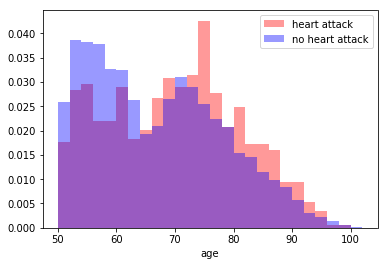

--------------------------------------------------
NULL count: 80
NULL perc: 0.5%


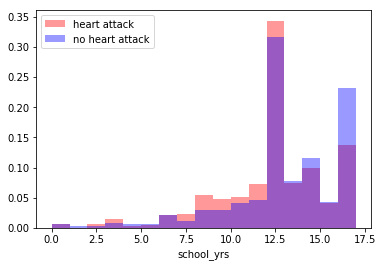

--------------------------------------------------
NULL count: 187
NULL perc: 1.1%


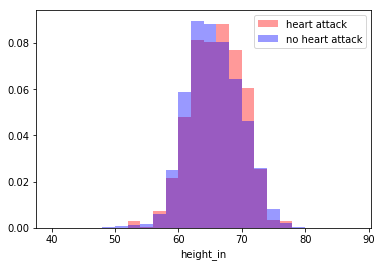

--------------------------------------------------
NULL count: 211
NULL perc: 1.3%


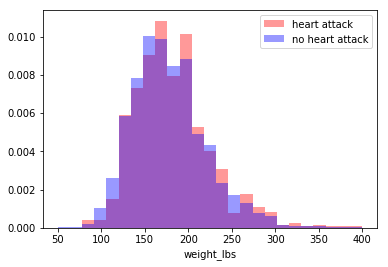

--------------------------------------------------
NULL count: 384
NULL perc: 2.4%


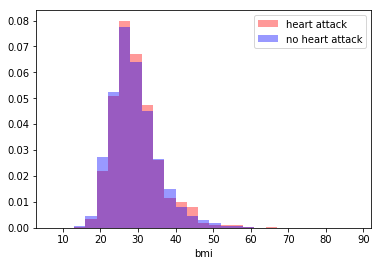

--------------------------------------------------
NULL count: 541
NULL perc: 3.3%


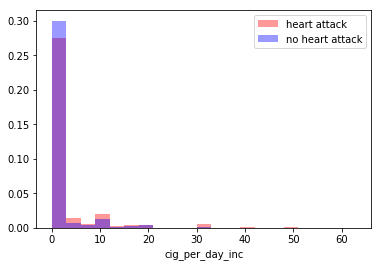

--------------------------------------------------
NULL count: 7320
NULL perc: 44.9%


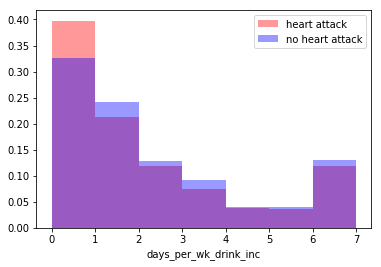

--------------------------------------------------
NULL count: 7320
NULL perc: 44.9%


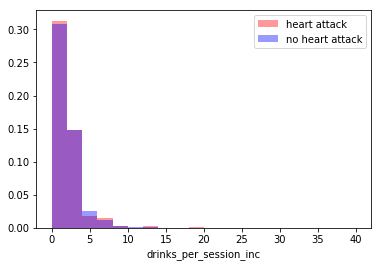

--------------------------------------------------
NULL count: 410
NULL perc: 2.5%


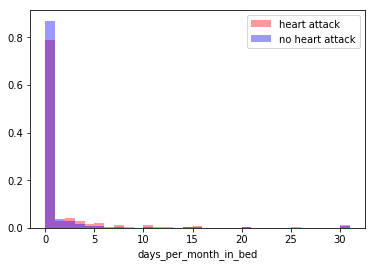

--------------------------------------------------


In [20]:
ha = xtrain[xtrain['heart_attack'] == 1]
nha = xtrain[xtrain['heart_attack'] == 0]
ha_color = 'red'
nha_color = 'blue'

# Create overlapping, normalized histograms to compare the distributions of the heart attack and 
# non-heart attack respondents in the specified continuous variable
def plot_continuous(d1, d2, col, d1_color, d2_color):
    dd1 = d1[d1[col].notnull()]
    dd2 = d2[d2[col].notnull()]
    print('NULL count:', str(d1[col].isnull().sum() + d2[col].isnull().sum()))
    print('NULL perc: ' + str(round((d1[col].isnull().sum() + d2[col].isnull().sum()) / (len(d1) + len(d2)) * 100, 1)) + '%')
    max_val = int(max(list(dd1[col]) + list(dd2[col]))) + 1
    min_val = int(min(list(dd1[col]) + list(dd2[col])))
    increments = int(round((max_val - min_val) / 25.0))
    if increments == 0:
        increments = 1
    sns.distplot(dd1[col].dropna().values, kde=False, bins=range(min_val, max_val, increments), norm_hist=True, color=d1_color, label='heart attack')
    sns.distplot(dd2[col].dropna().values, kde=False, bins=range(min_val, max_val, increments), norm_hist=True, color=d2_color, axlabel=col, label='no heart attack')
    plt.legend()

for iv in cont_ivs:
    plot_continuous(ha, nha, iv, ha_color, nha_color)
    plt.show()
    print('-' * 50)

Weak correlations between heart attack incidence and all of the continuous variables can be observed.  Correlations are apparent becase the normalized distributions for the heart attack victims are shifted relative to the distributions for the non-heart attack victims.  The correlation is strongest for the age variable--the distribution for heart attack victims is more concentrated in the older ages, whereas the non-heart attack victims is more concentrated in the younger ages.

For the categorical predictor variables, bar graphs were created using the Seaborn `barplot` function, showing the heart attack rate in each of the categories, along with error bars to indicate the uncertainty (standard deviation) in the measurement.

Note:  since the survey weights were not used in this analysis, the proportions (and errors) displayed in these bar charts are not necessarily representative of the US 50+ population as a whole.

NULL count: 0
NULL perc: 0.0%


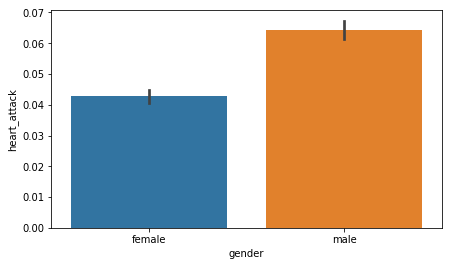

NULL count: 18
NULL perc: 0.1%


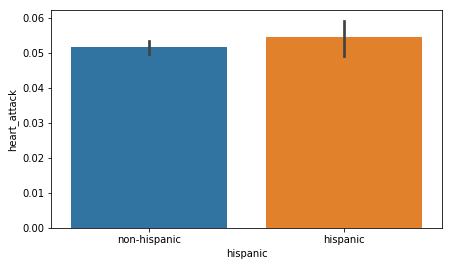

NULL count: 41
NULL perc: 0.3%


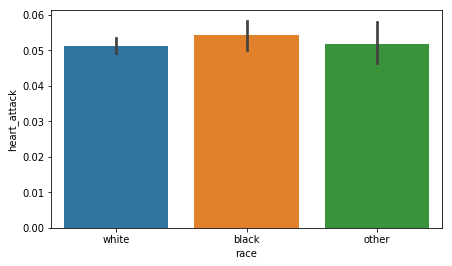

NULL count: 21
NULL perc: 0.1%


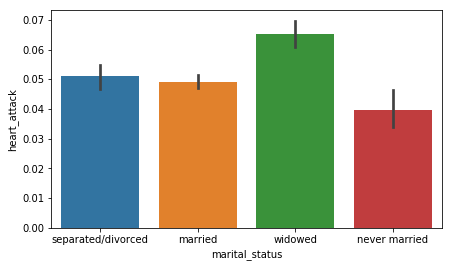

NULL count: 9
NULL perc: 0.1%


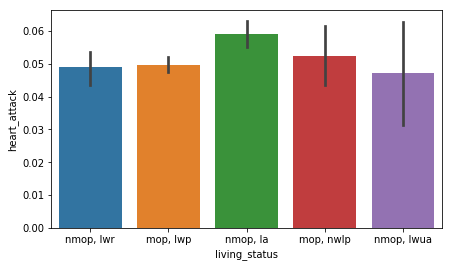

NULL count: 44
NULL perc: 0.3%


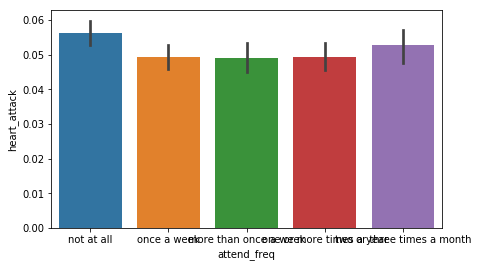

NULL count: 32
NULL perc: 0.2%


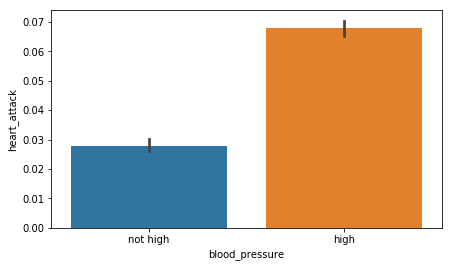

NULL count: 14
NULL perc: 0.1%


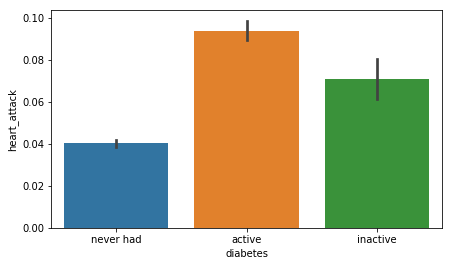

NULL count: 0
NULL perc: 0.0%


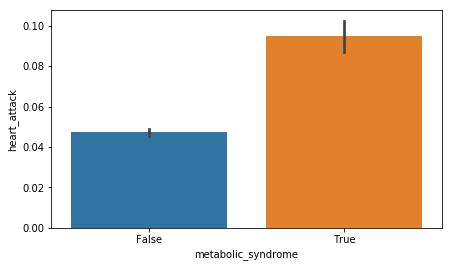

NULL count: 13
NULL perc: 0.1%


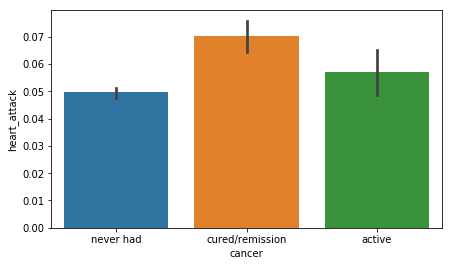

NULL count: 12
NULL perc: 0.1%


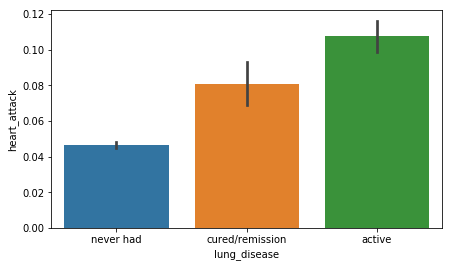

NULL count: 67
NULL perc: 0.4%


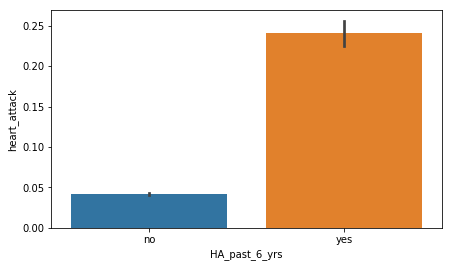

NULL count: 61
NULL perc: 0.4%


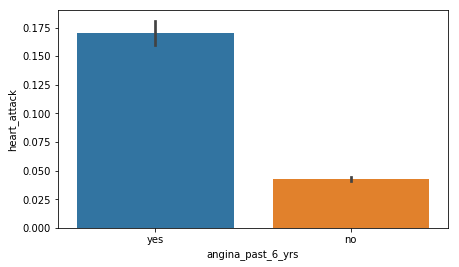

NULL count: 25
NULL perc: 0.2%


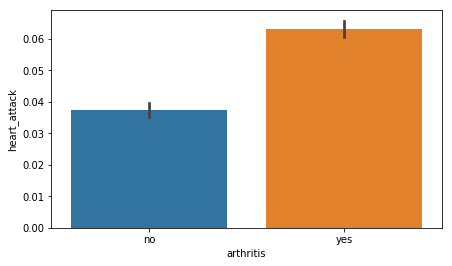

NULL count: 71
NULL perc: 0.4%


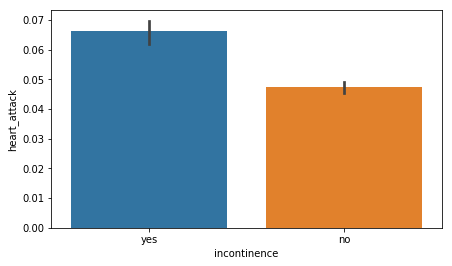

NULL count: 419
NULL perc: 2.6%


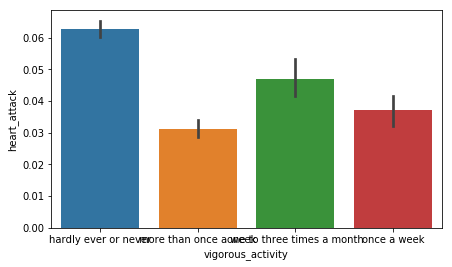

NULL count: 1130
NULL perc: 6.9%


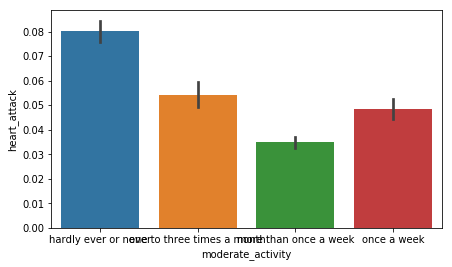

NULL count: 1352
NULL perc: 8.3%


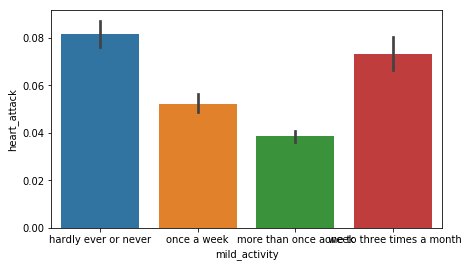

NULL count: 0
NULL perc: 0.0%


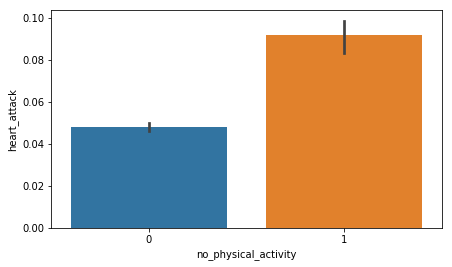

NULL count: 7048
NULL perc: 43.2%


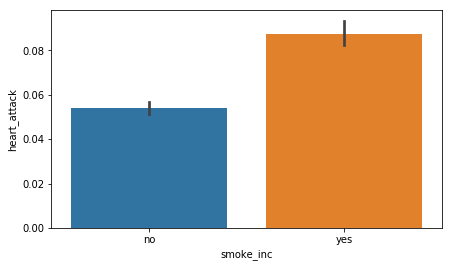

NULL count: 1025
NULL perc: 6.3%


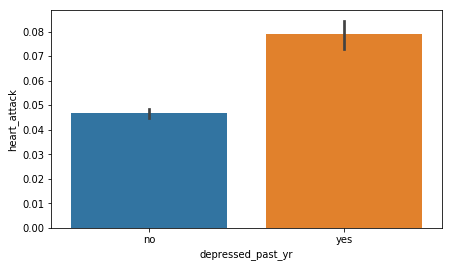

NULL count: 3342
NULL perc: 20.5%


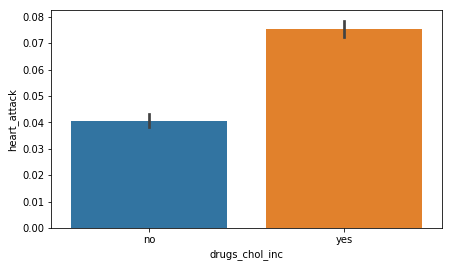

NULL count: 3303
NULL perc: 20.3%


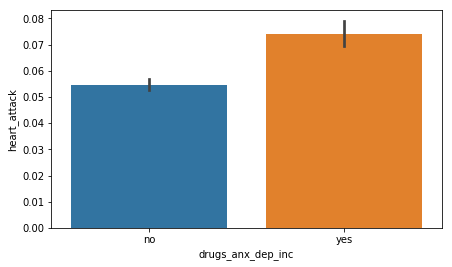

NULL count: 384
NULL perc: 2.4%


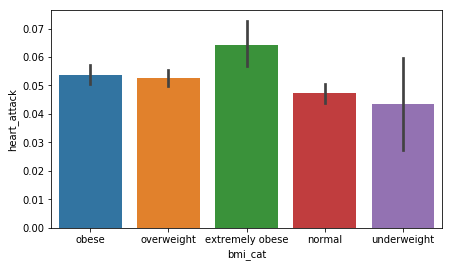

In [21]:
# Bar plots for categorical IVs
for iv in cat_ivs:
    plt.figure(figsize=(7, 4))
    print('NULL count:', xtrain[iv].isnull().sum())
    print('NULL perc: ' + str(round(xtrain[iv].isnull().sum() / len(xtrain) * 100, 1)) + '%')
    sns.barplot(x=iv, y="heart_attack", data=xtrain, ci=68)
    plt.show()
    print('=' * 100)

<a id="section11"></a>

**11. Recode the predictor variables for use in the predictive models**
- The findings from the exploratory analysis were used to determine how to transform the data for use in the predictive models
- Categorical variables were recoded as binary or “dummy” variables, where 1 indicates true (i.e., the presence of the category for the given observation) and 0 indicates false
    - This was necessary because the predictive models cannot take text as input--they must be converted into a form that is usable in mathematical operations
- For categorical variables with more than 2 classes, sometimes a binary variable was created for each category (except the reference category), and sometimes only one of the categories was made into a binary—generally, I only created variables for categories that had strong correlation with heart attack incidence
- In total, 39 predictor variables were created

- The selected variables and their codings are given below:
    - **age**:  age in years (continuous integer)
    - **school_yrs**:  number of years of school completed (continuous integer)
    - **height_in**:  height in inches (continuous float)
    - **weight_lbs**:  weight in pounds (continuous float)
    - **bmi**:  body mass index (BMI) (continuous float)
    - **male**:  1=male, 0=female
    - **hispanic**:  1=Hispanic, 0=not Hispanic
    - **black**:  1=black race, 0=not black
    - **other_race**:  1=not white or black race, 0=white or black race
    - **widowed**:  1=widow as of 2010, 0=not widow as of 2010
    - **live_alone**:  1=living alone, 0=not living alone
    - **never_attend**:  1=never attend religious services, 0=attend religious services at least sometimes
    - **high_blood_pressure**:  1=respondent reported high blood pressure, 0=did not report high blood pressure
    - **diabetes_active**:  1=currently experiencing active diabetes, 0=not experiencing (either never had or is in remission)
    - **diabetes_remission**:  1=had diabetes previously, but is in remission, 0=either active diabetes or never had diabetes
    - **metabolic_syndrome**:  1=have metabolic syndrome (high blood pressure + BMI >= 30 + active diabetes), 0=do not have metabolic syndrome
    - **cancer_active**:  1=have cancer for which they’re actively receiving treatment, 0=do not have cancer or cancer is cured/in remission
    - **cancer_remission**:  1=had cancer previously, but has been cured or is in remission, 0=either have active cancer or never had cancer
    - **lung_disease_active**:  1=active lung disease, 0=lung disease cured/in remission or never had lung disease
    - **lung_disease_remission**:  1=had lung disease, but is now cured/in remission, 0=either have active lung disease or never had lung disease
    - **HA_past_6_yrs**:  1=had a heart attack in the past 6 years (2004-2010), 0=did not have a heart attack in the past 6 years
    - **angina_past_6_yrs**:  1=had angina (chest pain) in the past 6 years (2004-2010), 0=did not have angina in the past 6 years
    - **arthritis**:  1=have arthritis, 0=do not have arthritis
    - **incontinence**:  1=have incontinence, 0=do not have incontinence
    - **vig_act_never**:  1=never engage in vigorous physical activity, 0=engage in vigorous physical activity at least a few times a month
    - **vig_act_often**:  1=engage in vigorous physical activity at least several times a week, 0=do not engage in vigorous physical activity more than once per week
    - **mod_act_never**:  1=never engage in moderate physical activity, 0=engage in moderate physical activity at least a few times a month
    - **mod_act_often**:  1=engage in moderate physical activity at least several times a week, 0=do not engage in moderate physical activity more than once per week
    - **mild_act_never**:  1=never engage in mild physical activity, 0=engage in mild physical activity at least a few times a month
    - **mild_act_often**:  1=engage in mild physical activity at least several times a week, 0=do not engage in mild physical activity more than once per week
    - **no_physical_activity**:  1=rarely or never engage in any physical activity (whether vigorous, moderate, or mild), 0=engage in at least some physical activity
    - **smoke**:  1=active smoker, 0=not active smoker
    - **depressed**:  1=felt depressed for 2 weeks or more in a row within the past year, 0=did not feel depressed for two or more weeks in a row in the past year
    - **drugs_chol**:  1=currently taking drugs to reduce cholesterol, 0=not currently taking drugs to reduce cholesterol
    - **drugs_anx_dep**:  1=currently taking drugs for anxiety or depression, 0=not currently taking drugs for anxiety or depression
    - **extremely_obese**:  1=BMI >= 40, 0=BMI < 40
    - **drink_alcohol**:  1=drink alcohol at least once per week, 0=do no drink alcohol regularly
    - **mt_1_day_in_bed**:  1=spent more than 1 day in bed in the past month, 0=spent 1 or less days in bed last month
- The recoding/creation of the final predictor variables was performed by the `recode_data` function

In [112]:
# Recode the continuous and categorical variables for predictive modeling
# Convert categorical variables to "dummy" (0/1) variables
def recode_data(df):
    output = copy.deepcopy(df)
 
    output['male'] = (output['gender'] == 'male') * 1
    output['hispanic'] = output['hispanic'].map({'hispanic': 1, 'non-hispanic': 0})
    output['black'] = output['race'].map({'white': 0, 'black': 1, 'other': 0})
    output['other_race'] = output['race'].map({'white': 0, 'black': 0, 'other': 1})
    output['widowed'] = output['marital_status'].map({'married': 0, 'widowed': 1, 'separated/divorced': 0, 'never married': 0})
    output['never_married'] = output['marital_status'].map({'married': 0, 'widowed': 0, 'separated/divorced': 0, 'never married': 1})
    output['live_alone'] = output['living_status'].map({'mop, lwp': 0, 'nmop, la': 1, 'nmop, lwr': 0, 'mop, nwlp': 0, 'nmop, lwua': 0})
    output['never_attend'] = output['attend_freq'].map({'not at all': 1, 'once a week': 0, 'one or more times a year': 0, 'more than once a week': 0, 'two or three times a month': 0})
    output['high_blood_pressure'] = output['blood_pressure'].map({'high': 1, 'not high': 0})
    output['diabetes_active'] = output['diabetes'].map({'never had': 0, 'active': 1, 'inactive': 0})
    output['diabetes_remission'] = output['diabetes'].map({'never had': 0, 'active': 0, 'inactive': 1})
    output['one_of_3_null'] = (output['blood_pressure'].isnull()) | (output['bmi'].isnull()) | (output['diabetes'].isnull())
    metabolic_syndrome = []
    for r in output.to_dict('records'):
        if r['one_of_3_null']:
            metabolic_syndrome.append(None)
        elif r['blood_pressure'] == 'high' and r['bmi'] >= 30 and r['diabetes'] == 'active':
            metabolic_syndrome.append(1)
        else:
            metabolic_syndrome.append(0)
    output['metabolic_syndrome'] = metabolic_syndrome
    output['cancer_active'] = output['cancer'].map({'never had': 0, 'cured/remission': 0, 'active': 1})
    output['cancer_remission'] = output['cancer'].map({'never had': 0, 'cured/remission': 1, 'active': 0})
    output['lung_disease_active'] = output['lung_disease'].map({'never had': 0, 'active': 1, 'cured/remission': 0})
    output['lung_disease_remission'] = output['lung_disease'].map({'never had': 0, 'active': 0, 'cured/remission': 1})
    output['HA_past_6_yrs'] = output['HA_past_6_yrs'].map({'no': 0, 'yes': 1})
    output['angina_past_6_yrs'] = output['angina_past_6_yrs'].map({'no': 0, 'yes': 1})
    output['arthritis'] = output['arthritis'].map({'yes': 1, 'no': 0})
    output['incontinence'] = output['incontinence'].map({'yes': 1, 'no': 0})
    output['vig_act_never'] = output['vigorous_activity'].map({'hardly ever or never': 1, 'more than once a week': 0, 'once a week': 0, 'one to three times a month': 0})
    output['vig_act_often'] = output['vigorous_activity'].map({'hardly ever or never': 0, 'more than once a week': 1, 'once a week': 0, 'one to three times a month': 0})
    output['mod_act_never'] = output['moderate_activity'].map({'hardly ever or never': 1, 'more than once a week': 0, 'once a week': 0, 'one to three times a month': 0})
    output['mod_act_often'] = output['moderate_activity'].map({'hardly ever or never': 0, 'more than once a week': 1, 'once a week': 0, 'one to three times a month': 0})
    output['mild_act_never'] = output['mild_activity'].map({'hardly ever or never': 1, 'more than once a week': 0, 'once a week': 0, 'one to three times a month': 0})
    output['mild_act_often'] = output['mild_activity'].map({'hardly ever or never': 0, 'more than once a week': 1, 'once a week': 0, 'one to three times a month': 0})
    output['missing_activity_data'] = (xtrain['vigorous_activity'].isnull()) | (xtrain['moderate_activity'].isnull()) | (xtrain['mild_activity'].isnull())
    no_physical_activity = []
    for r in output.to_dict('records'):
        if r['missing_activity_data']:
            no_physical_activity.append(None)
        elif r['vig_act_never'] == 1 and r['mod_act_never'] == 1 and r['mild_act_never'] == 1:
            no_physical_activity.append(1)
        else:
            no_physical_activity.append(0)
    output['no_physical_activity'] = no_physical_activity
    output['smoke'] = output['smoke_inc'].map({'yes': 1, 'no': 0})
    output['depressed'] = output['depressed_past_yr'].map({'yes': 1, 'no': 0})
    output['drugs_chol'] = output['drugs_chol_inc'].map({'yes': 1, 'no': 0})
    output['drugs_anx_dep'] = output['drugs_anx_dep_inc'].map({'yes': 1, 'no': 0})
    output['extremely_obese'] = output['bmi_cat'].map({'overweight': 0, 'obese': 0, 'normal': 0, 'extremely obese': 1, 'underweight': 0})
    output['drink_alcohol'] = output['days_per_wk_drink_inc'].map({0.0: 0, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1, 6.0: 1, 7.0: 1})
    day_map = dict([[v, 1] if v > 1 else [v, 0] for v in list(output[output['days_per_month_in_bed'].notnull()]['days_per_month_in_bed'].unique())])
    output['mt_1_day_in_bed'] = output['days_per_month_in_bed'].map(day_map)
    
    return output

xtrain2 = recode_data(xtrain)

In [23]:
# List the updated categorical and continuous variables that will be used in the deep learning model
cont_ivs2 = ['age', 'school_yrs', 'height_in', 'weight_lbs', 'bmi']
cat_ivs2 = [ 
    'male', 'hispanic', 'black', 'other_race', 'widowed', 'never_married', 'live_alone', 'never_attend', 
    'high_blood_pressure', 'diabetes_active', 'diabetes_remission', 'metabolic_syndrome', 'cancer_active', 
    'cancer_remission', 'lung_disease_active', 'lung_disease_remission', 'HA_past_6_yrs', 'angina_past_6_yrs', 
    'arthritis', 'incontinence', 'vig_act_never', 'vig_act_often', 'mod_act_never', 'mod_act_often', 
    'mild_act_never', 'mild_act_often', 'no_physical_activity', 'smoke', 'depressed', 'drugs_chol', 
    'drugs_anx_dep', 'extremely_obese', 'drink_alcohol', 'mt_1_day_in_bed'
]

log_reg_impute_cat_ivs = ['no_physical_activity', 'smoke', 'drugs_chol', 'drugs_anx_dep', 'drink_alcohol']
mean_impute_cols = [col for col in cat_ivs2 if col not in log_reg_impute_cat_ivs]

<a id="section12"></a>

**12. Impute missing values**
- Imputation (replacement) of missing values was necessary due to non-response and that certain questions were only asked to random subsets of the sample
- For variables with less than 10% of values missing, a statistic was used to fill the missing values:
    - Continuous variables:  median
    - Categorical (binary) variables:  mean
- For variables with more than 10% of values missing, a logistic regression model was fit using the other variables (with less than 10% of values missing) to predict the missing values
- The only variables that had more than 10% missing were categorical, thus logistic regression was the appropriate form of regression to use for imputation
- The variables with more than 10% of values missing were:
    - no_physical_activity
    - smoke
    - drugs_chol
    - drugs_anx_dep
    - drink_alcohol
- The logistic regression models were fit using the Python Scikit-Learn library

Steps
- First, the variables with less than 10% of values missing were imputed using the median/mean as described above
    - This was performed using the `get_lt_10_perc_impute_stats` and `impute_lt_10_perc_predictors` functions
- Then, logistic regression models were fit and used to fill the missing values for the variables with greater than 10% of values missing
    - This was performed using the `get_gt_10_per_impute_models` and `impute_gt_10_perc_predictors` functions
- The statistics (medians/means) and logistic regression models were saved so they could later be used to impute the missing values in the test set

In [24]:
# Get the imputation statistics (mean/median) for variables with less than 10% NULL values
def get_lt_10_perc_impute_stats(df, median_cols, mean_cols):
    impute_stats = {}
    for col in median_cols:
        impute_stats[col] = df[col].median()
    for col in mean_cols:
        impute_stats[col] = df[col].mean()
    return impute_stats
        
impute_stats = get_lt_10_perc_impute_stats(xtrain2, cont_ivs2, mean_impute_cols)
print(impute_stats)

{'age': 66.0, 'school_yrs': 12.0, 'height_in': 65.25, 'weight_lbs': 175.0, 'bmi': 28.172809405050934, 'male': 0.4265644171779141, 'hispanic': 0.12885394914629653, 'black': 0.194107878713328, 'other_race': 0.07946368165323821, 'widowed': 0.18784937649732786, 'never_married': 0.054241661035690156, 'live_alone': 0.2187711006076975, 'never_attend': 0.26531742125984253, 'high_blood_pressure': 0.601057290386034, 'diabetes_active': 0.19108436694093087, 'diabetes_remission': 0.04500798231609972, 'metabolic_syndrome': 0.09528907922912205, 'cancer_active': 0.045312212193774175, 'cancer_remission': 0.09719408116903051, 'lung_disease_active': 0.07342829076620826, 'lung_disease_remission': 0.030329076620825148, 'HA_past_6_yrs': 0.049343929033450376, 'angina_past_6_yrs': 0.07112506927766488, 'arthritis': 0.5639324116743472, 'incontinence': 0.2384620124468544, 'vig_act_never': 0.584597947232542, 'vig_act_often': 0.2212077325105472, 'mod_act_never': 0.26407382992748846, 'mod_act_often': 0.422412656558

In [25]:
# Create a new dataset with all of the imputed values filled in
def impute_lt_10_perc_predictors(df, impute_stats):
    output = copy.deepcopy(df)
    for col, stat in impute_stats.items():
        output[col] = output[col].fillna(stat)
    return output

xtrain3 = impute_lt_10_perc_predictors(xtrain2, impute_stats)
for iv in cont_ivs2 + cat_ivs2:
    if xtrain3[iv].isnull().sum() > 0:
        print(iv)

no_physical_activity
smoke
drugs_chol
drugs_anx_dep
drink_alcohol


In [26]:
# Get the imputation models (logistic regression) for the variables with >= 10% NULL values
def get_gt_10_per_impute_models(df, dvs, ivs):
    d2 = copy.deepcopy(df)
    models = {}
    for iv in ivs:
        models[iv + '_mean'] = d2[iv].mean()
        models[iv + '_std'] = d2[iv].std()
        d2[iv] = (d2[iv] - d2[iv].mean()) / d2[iv].std()
    for dv in dvs:
        d2_nonull = d2[d2[dv].notnull()]
        print("Variable distribution for non-NULL values")
        print(d2_nonull[dv].value_counts(dropna=False) / len(d2_nonull))
        d2_isnull = d2[d2[dv].isnull()]        
        if dv == 'no_physical_activity':
            C = 0.0006
        else:
            C = 1.0
        logit2 = LogisticRegression(penalty='l1', C=C).fit(d2_nonull[ivs], d2_nonull[dv])
        pred2 = logit2.predict(d2_isnull[ivs])
        print("Variable distribution for IMPUTED values")
        print(pd.Series(pred2).value_counts(dropna=False) / len(pred2))
        models[dv] = logit2
        print('=' * 100)
    return models

impute_models = get_gt_10_per_impute_models(xtrain3, log_reg_impute_cat_ivs, cont_ivs2 + mean_impute_cols)

Variable distribution for non-NULL values
0.0    0.897751
1.0    0.102249
Name: no_physical_activity, dtype: float64
Variable distribution for IMPUTED values
0.0    0.945174
1.0    0.054826
dtype: float64
Variable distribution for non-NULL values
0.0    0.737138
1.0    0.262862
Name: smoke, dtype: float64
Variable distribution for IMPUTED values
0.0    0.928774
1.0    0.071226
dtype: float64
Variable distribution for non-NULL values
1.0    0.531872
0.0    0.468128
Name: drugs_chol, dtype: float64
Variable distribution for IMPUTED values
0.0    0.880012
1.0    0.119988
dtype: float64
Variable distribution for non-NULL values
0.0    0.775256
1.0    0.224744
Name: drugs_anx_dep, dtype: float64
Variable distribution for IMPUTED values
0.0    0.953981
1.0    0.046019
dtype: float64
Variable distribution for non-NULL values
1.0    0.670267
0.0    0.329733
Name: drink_alcohol, dtype: float64
Variable distribution for IMPUTED values
1.0    0.76735
0.0    0.23265
dtype: float64


In [27]:
# Impute data for variables with >= 10% of observations missing (NULL)
def impute_gt_10_perc_predictors(df, ivs, impute_ivs, imputation_models):
    output = copy.deepcopy(df)
    output2 = copy.deepcopy(df)
    for iv in ivs:
        output2[iv] = (output2[iv] - imputation_models[iv + '_mean']) / imputation_models[iv + '_std']
    for iv in impute_ivs:
        # Relies on the predictor and target data frames to have the same order
        print(output[iv].value_counts(dropna=False))
        print('*' * 25)
        output_not_imputed = output[output[iv].notnull()]
        output_imputed = output[output[iv].isnull()]
        output_imputed_predictors = output2[output2[iv].isnull()]
        output_imputed[iv] = imputation_models[iv].predict(output_imputed_predictors[ivs])
        output = output_not_imputed.append(output_imputed)
        print(output[iv].value_counts(dropna=False))
        print('-' * 50)
    return output
            
xtrain4 = impute_gt_10_perc_predictors(xtrain3, cont_ivs2 + mean_impute_cols, log_reg_impute_cat_ivs, impute_models)

 0.0    12652
NaN      2207
 1.0     1441
Name: no_physical_activity, dtype: int64
*************************
0.0    14738
1.0     1562
Name: no_physical_activity, dtype: int64
--------------------------------------------------
NaN     7048
 0.0    6820
 1.0    2432
Name: smoke, dtype: int64
*************************
0.0    13366
1.0     2934
Name: smoke, dtype: int64
--------------------------------------------------
 1.0    6892
 0.0    6066
NaN     3342
Name: drugs_chol, dtype: int64
*************************
0.0    9007
1.0    7293
Name: drugs_chol, dtype: int64
--------------------------------------------------
 0.0    10076
NaN      3303
 1.0     2921
Name: drugs_anx_dep, dtype: int64
*************************
0.0    13227
1.0     3073
Name: drugs_anx_dep, dtype: int64
--------------------------------------------------
NaN     7320
 1.0    6019
 0.0    2961
Name: drink_alcohol, dtype: int64
*************************
1.0    11636
0.0     4664
Name: drink_alcohol, dtype: int64
-----

In [28]:
full_ivs = cont_ivs2 + cat_ivs2
xtrain5 = xtrain4[full_ivs + ['heart_attack']]
xtrain5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 9059 to 1816
Data columns (total 40 columns):
age                       16300 non-null int64
school_yrs                16300 non-null float64
height_in                 16300 non-null float64
weight_lbs                16300 non-null float64
bmi                       16300 non-null float64
male                      16300 non-null int64
hispanic                  16300 non-null float64
black                     16300 non-null float64
other_race                16300 non-null float64
widowed                   16300 non-null float64
never_married             16300 non-null float64
live_alone                16300 non-null float64
never_attend              16300 non-null float64
high_blood_pressure       16300 non-null float64
diabetes_active           16300 non-null float64
diabetes_remission        16300 non-null float64
metabolic_syndrome        16300 non-null float64
cancer_active             16300 non-null float64
cancer_remi

## Review Results of Data Recoding and Imputation

Visualize the results of the data recoding and imputation to ensure the results are reasonable.

In [29]:
# Response variable
xtrain5['heart_attack'].value_counts(dropna=False)

0    15455
1      845
Name: heart_attack, dtype: int64

NULL count: 0
NULL perc: 0.0%


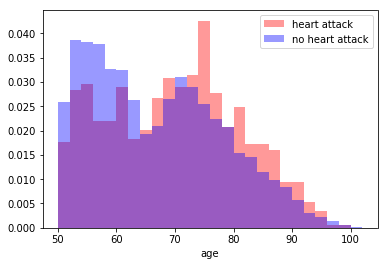

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


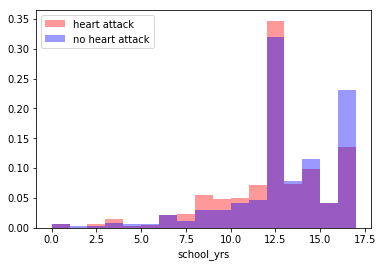

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


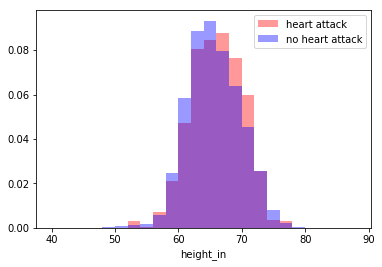

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


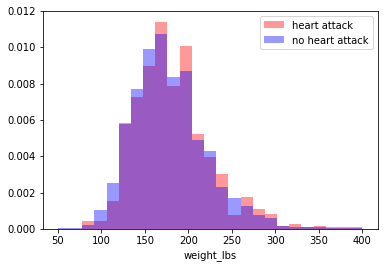

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


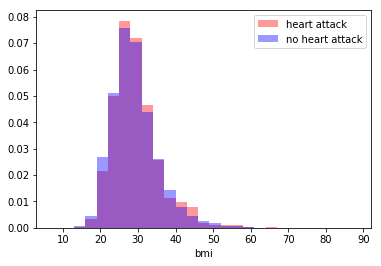

--------------------------------------------------


In [30]:
# Continuous predictor variables
ha2 = xtrain5[xtrain5['heart_attack'] == 1]
nha2 = xtrain5[xtrain5['heart_attack'] == 0]

for iv in cont_ivs2:
    plot_continuous(ha2, nha2, iv, ha_color, nha_color)
    plt.show()
    print('-' * 50)

NULL count: 0
NULL perc: 0.0%


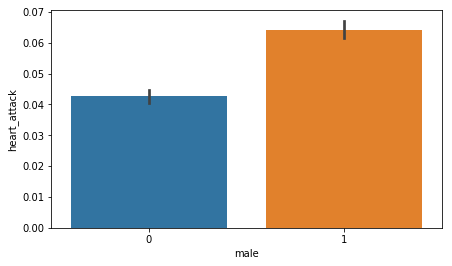

NULL count: 0
NULL perc: 0.0%


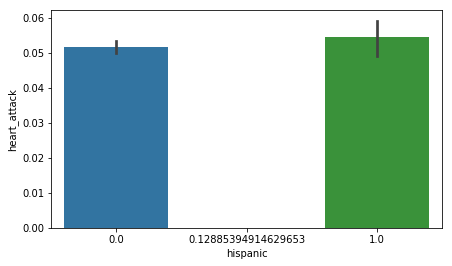

NULL count: 0
NULL perc: 0.0%


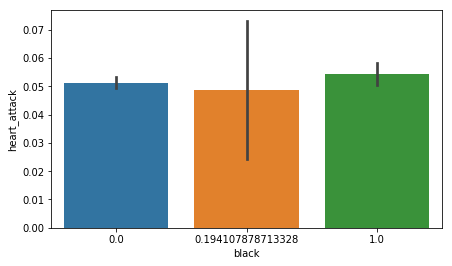

NULL count: 0
NULL perc: 0.0%


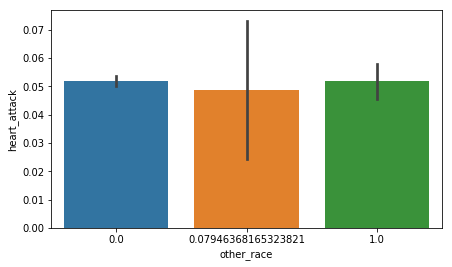

NULL count: 0
NULL perc: 0.0%


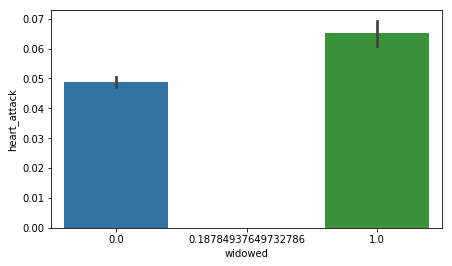

NULL count: 0
NULL perc: 0.0%


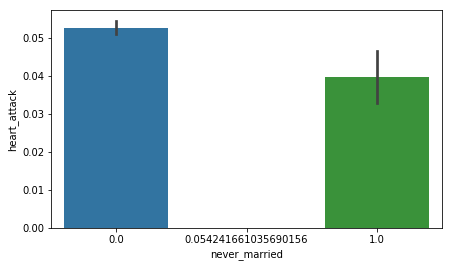

NULL count: 0
NULL perc: 0.0%


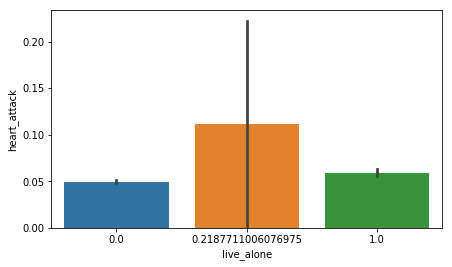

NULL count: 0
NULL perc: 0.0%


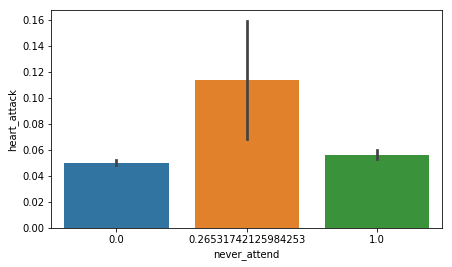

NULL count: 0
NULL perc: 0.0%


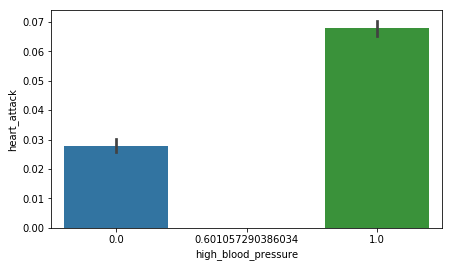

NULL count: 0
NULL perc: 0.0%


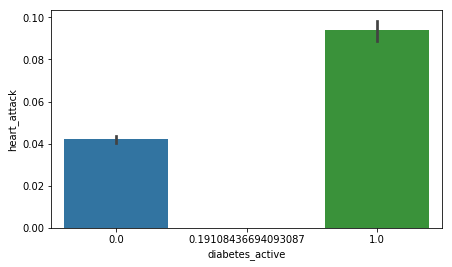

NULL count: 0
NULL perc: 0.0%


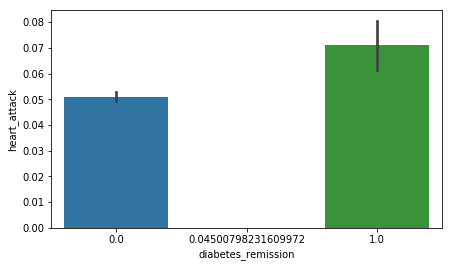

NULL count: 0
NULL perc: 0.0%


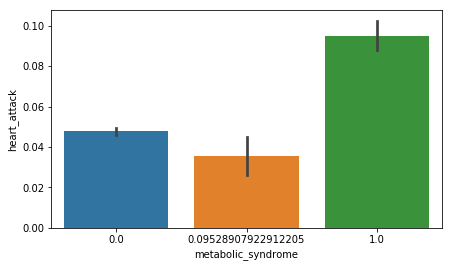

NULL count: 0
NULL perc: 0.0%


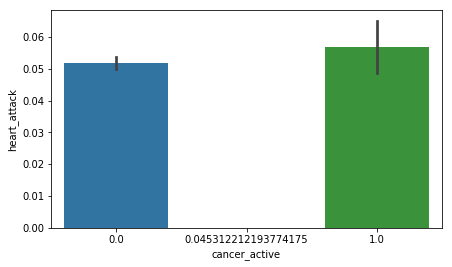

NULL count: 0
NULL perc: 0.0%


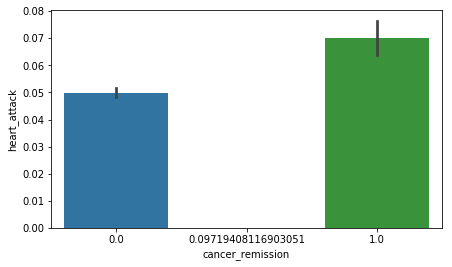

NULL count: 0
NULL perc: 0.0%


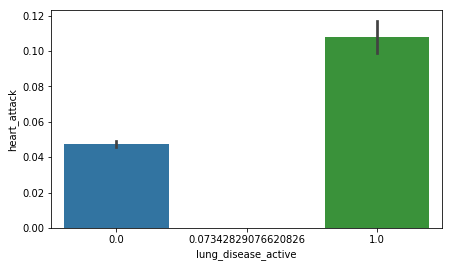

NULL count: 0
NULL perc: 0.0%


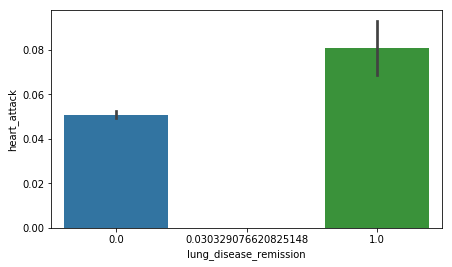

NULL count: 0
NULL perc: 0.0%


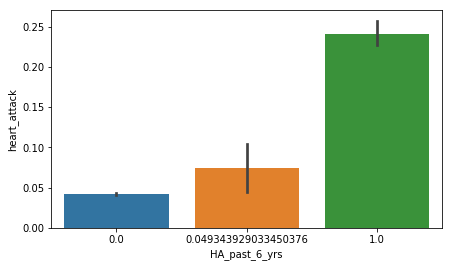

NULL count: 0
NULL perc: 0.0%


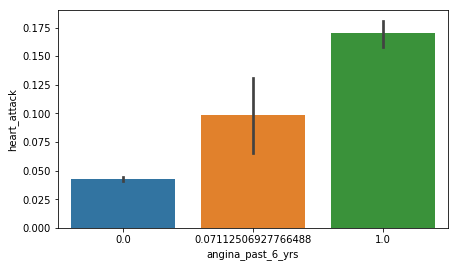

NULL count: 0
NULL perc: 0.0%


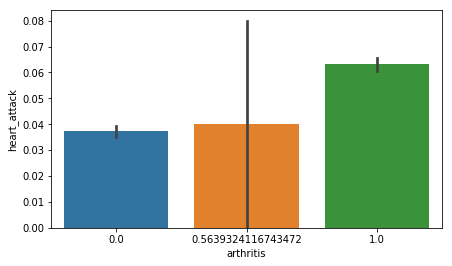

NULL count: 0
NULL perc: 0.0%


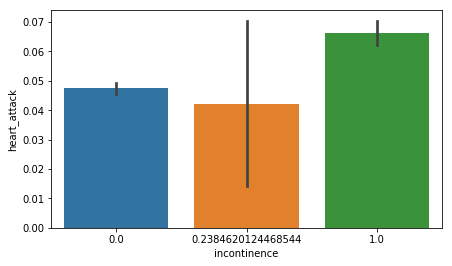

NULL count: 0
NULL perc: 0.0%


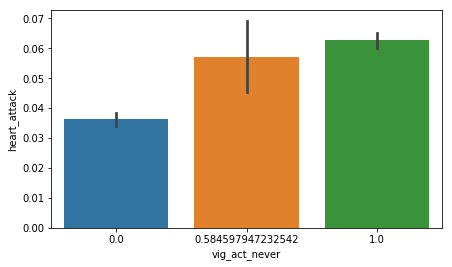

NULL count: 0
NULL perc: 0.0%


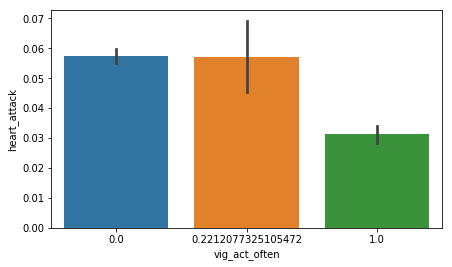

NULL count: 0
NULL perc: 0.0%


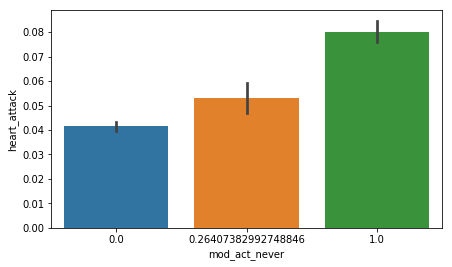

NULL count: 0
NULL perc: 0.0%


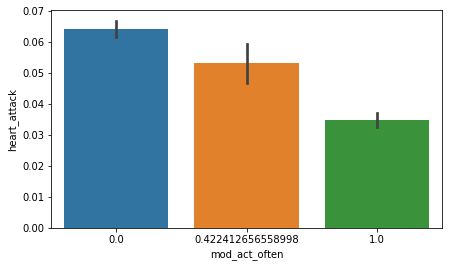

NULL count: 0
NULL perc: 0.0%


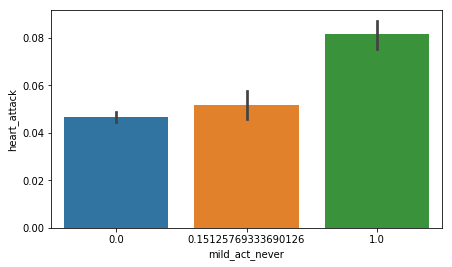

NULL count: 0
NULL perc: 0.0%


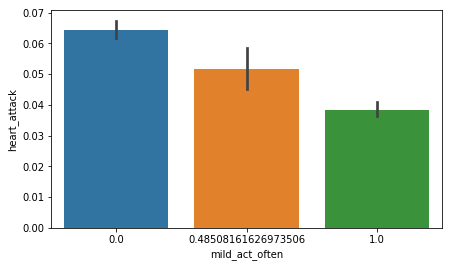

NULL count: 0
NULL perc: 0.0%


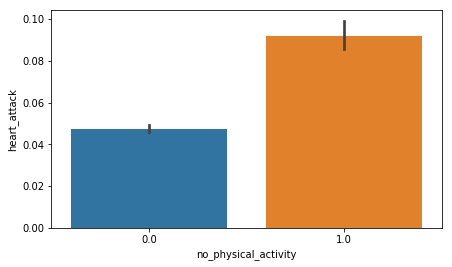

NULL count: 0
NULL perc: 0.0%


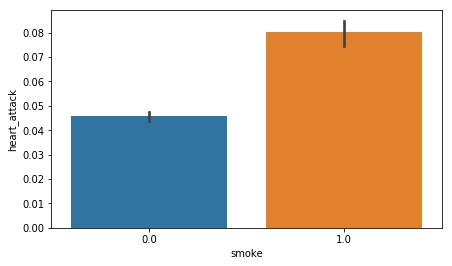

NULL count: 0
NULL perc: 0.0%


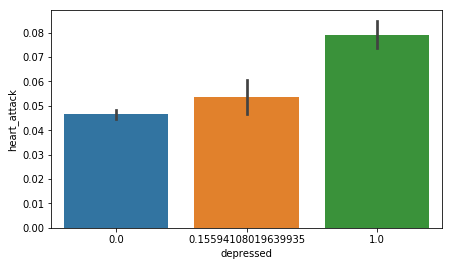

NULL count: 0
NULL perc: 0.0%


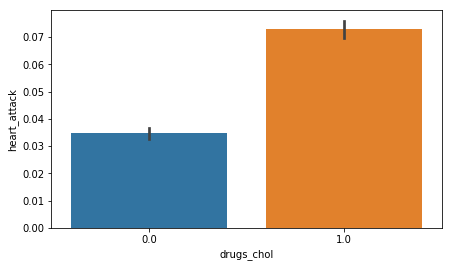

NULL count: 0
NULL perc: 0.0%


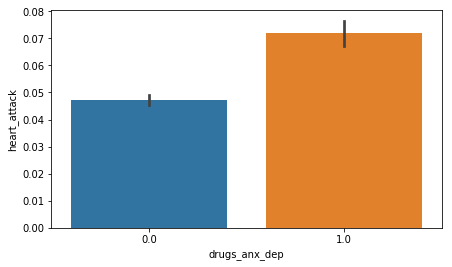

NULL count: 0
NULL perc: 0.0%


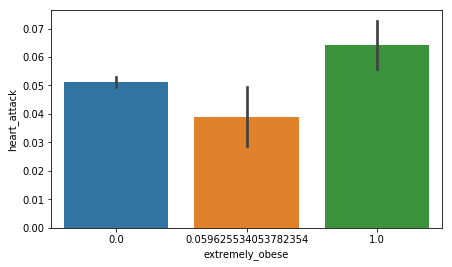

NULL count: 0
NULL perc: 0.0%


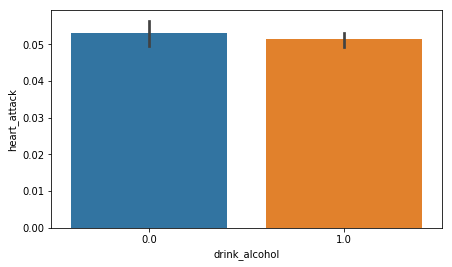

NULL count: 0
NULL perc: 0.0%


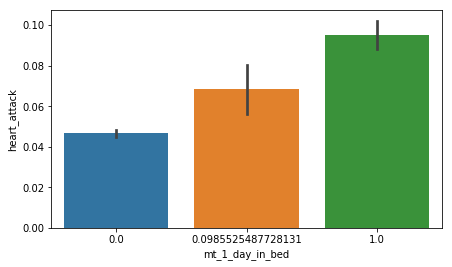

In [31]:
# Categorical (binary) predictor variables
for iv in cat_ivs2:
    plt.figure(figsize=(7, 4))
    print('NULL count:', xtrain5[iv].isnull().sum())
    print('NULL perc: ' + str(round(xtrain5[iv].isnull().sum() / len(xtrain5) * 100, 1)) + '%')
    sns.barplot(x=iv, y="heart_attack", data=xtrain5, ci=68)
    plt.show()
    print('=' * 100)

Nothing looks out of the ordinary.

<a id="section13"></a>

**13. Rescale the data**
- Since many types of models, such as neural networks, perform better when all of the input variables are on the same scale, the predictor variables were rescaled by subtracting the mean and then dividing by the standard deviation
- This was performed by the `get_rescale_parameters` and `rescale_data functions`
- The means and standard deviations were saved so they could be used to rescale the test data later on

In [32]:
# Get parameters to rescale data
def get_rescale_parameters(df, ivs):
    params = {}
    for iv in ivs:
        params[iv + '_mean'] = df[iv].mean()
        params[iv + '_std'] = df[iv].std()
    return params

# Rescale data using supplied means and standard deviations
def rescale_data(df, ivs, rescale_params):
    output = copy.deepcopy(df)
    for iv in ivs:
        output[iv] = (output[iv] - rescale_params[iv + '_mean']) / rescale_params[iv + '_std']
    return output

rescale_params = get_rescale_parameters(xtrain5, full_ivs)
xtrain6 = rescale_data(xtrain5, full_ivs, rescale_params)
print(xtrain6.info())
xtrain6.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 9059 to 1816
Data columns (total 40 columns):
age                       16300 non-null float64
school_yrs                16300 non-null float64
height_in                 16300 non-null float64
weight_lbs                16300 non-null float64
bmi                       16300 non-null float64
male                      16300 non-null float64
hispanic                  16300 non-null float64
black                     16300 non-null float64
other_race                16300 non-null float64
widowed                   16300 non-null float64
never_married             16300 non-null float64
live_alone                16300 non-null float64
never_attend              16300 non-null float64
high_blood_pressure       16300 non-null float64
diabetes_active           16300 non-null float64
diabetes_remission        16300 non-null float64
metabolic_syndrome        16300 non-null float64
cancer_active             16300 non-null float64
cancer_

,age,school_yrs,height_in,weight_lbs,bmi,male,hispanic,black,other_race,widowed,...,mild_act_often,no_physical_activity,smoke,depressed,drugs_chol,drugs_anx_dep,extremely_obese,drink_alcohol,mt_1_day_in_bed,heart_attack
9059,0.028361,-0.182221,-0.175639,0.511331,0.696950,-0.862455,-0.384796,2.040095,-0.294169,-0.481231,...,-1.013508,-0.325543,-0.468507,-0.444001,-0.899808,-0.481989,-0.254817,0.633088,-0.334875,0
9153,-0.415377,-0.182221,-0.903507,0.347762,1.021181,-0.862455,2.601496,-0.491379,-0.294169,-0.481231,...,1.075848,-0.325543,-0.468507,-0.444001,-0.899808,2.074608,-0.254817,-1.579462,-0.334875,0
18138,-1.125357,-0.493042,-0.842851,-0.470082,-0.037980,-0.862455,2.601496,-0.491379,3.407765,-0.481231,...,-1.013508,-0.325543,2.134309,2.403234,1.111280,2.074608,-0.254817,0.633088,-0.334875,1
12655,-0.859115,1.061063,1.098129,0.090726,-0.478922,1.159409,-0.384796,-0.491379,-0.294169,-0.481231,...,1.075848,-0.325543,-0.468507,-0.444001,-0.899808,-0.481989,-0.254817,0.633088,-0.334875,0
16623,-1.125357,0.750242,0.855506,-0.540183,-0.989622,1.159409,-0.384796,2.040095,-0.294169,-0.481231,...,1.075848,-0.325543,2.134309,-0.444001,1.111280,-0.481989,-0.254817,0.633088,-0.334875,0


<a id="section14"></a>

**14. Process the test data**
- Although this step could be performed later on, the test data was processed by recoding the predictor variables, imputing the missing values, and rescaling the data as described above
- The statistics and logistic regression models derived from the training set were used to impute and rescale the test set data

In [33]:
# Process the test data
print(xtest.shape)
xtest2 = recode_data(xtest)
xtest3 = impute_lt_10_perc_predictors(xtest2, impute_stats)
xtest4 = impute_gt_10_perc_predictors(xtest3, cont_ivs2 + mean_impute_cols, log_reg_impute_cat_ivs, impute_models)
xtest5 = xtest4[full_ivs + ['heart_attack']]
xtest6 = rescale_data(xtest5, full_ivs, rescale_params)
print(xtest6.info())
xtest6.head()

(4076, 47)
NaN    4076
Name: no_physical_activity, dtype: int64
*************************
0.0    3499
1.0     577
Name: no_physical_activity, dtype: int64
--------------------------------------------------
NaN     1833
 0.0    1621
 1.0     622
Name: smoke, dtype: int64
*************************
0.0    3328
1.0     748
Name: smoke, dtype: int64
--------------------------------------------------
 1.0    1664
 0.0    1576
NaN      836
Name: drugs_chol, dtype: int64
*************************
0.0    2326
1.0    1750
Name: drugs_chol, dtype: int64
--------------------------------------------------
 0.0    2539
NaN      824
 1.0     713
Name: drugs_anx_dep, dtype: int64
*************************
0.0    3323
1.0     753
Name: drugs_anx_dep, dtype: int64
--------------------------------------------------
NaN     1848
 1.0    1455
 0.0     773
Name: drink_alcohol, dtype: int64
*************************
1.0    2888
0.0    1188
Name: drink_alcohol, dtype: int64
-----------------------------------

,age,school_yrs,height_in,weight_lbs,bmi,male,hispanic,black,other_race,widowed,...,mild_act_often,no_physical_activity,smoke,depressed,drugs_chol,drugs_anx_dep,extremely_obese,drink_alcohol,mt_1_day_in_bed,heart_attack
2145,0.294604,-0.182221,-0.842851,0.043992,0.599268,-0.862455,-0.384796,-0.491379,-0.294169,-0.481231,...,1.075848,-0.325543,-0.468507,-4.440008e-01,1.111280,-0.481989,-0.254817,0.633088,-0.334875,0
13355,-0.859115,-0.182221,2.068619,0.043992,-0.954602,1.159409,-0.384796,-0.491379,-0.294169,-0.481231,...,1.075848,-0.325543,-0.468507,-1.335550e-14,1.111280,-0.481989,-0.254817,0.633088,-0.334875,0
15483,-1.036610,0.750242,0.370261,-0.376614,-0.596350,-0.862455,-0.384796,-0.491379,-0.294169,-0.481231,...,1.075848,-0.325543,-0.468507,2.403234e+00,-0.899808,2.074608,-0.254817,0.633088,-0.334875,0
12492,-0.415377,1.061063,0.673539,1.095506,0.763737,1.159409,-0.384796,-0.491379,-0.294169,-0.481231,...,-1.013508,-0.325543,2.134309,-4.440008e-01,-0.899808,-0.481989,-0.254817,0.633088,-0.334875,0
12457,-0.504124,0.128600,0.370261,-0.773853,-1.018016,1.159409,-0.384796,-0.491379,-0.294169,-0.481231,...,1.075848,-0.325543,2.134309,-4.440008e-01,1.111280,-0.481989,-0.254817,0.633088,-0.334875,0


### Visualize Results of Recoding and Imputing Test Set

To ensure that the recoding/transformation was completed properly and that the results make sense, the predictors in the test set were visualized.

NULL count: 0
NULL perc: 0.0%


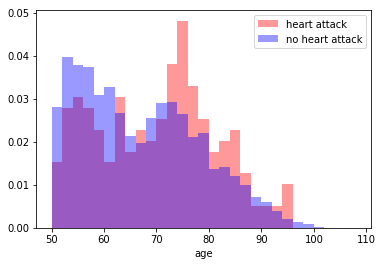

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


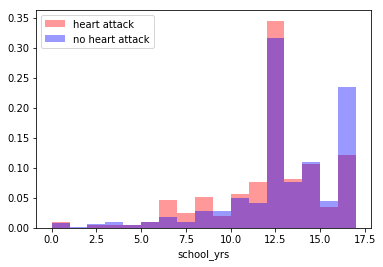

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


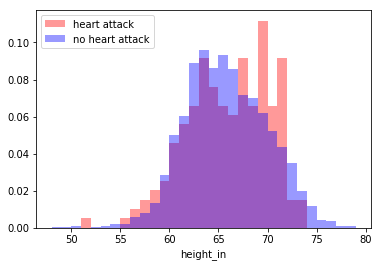

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


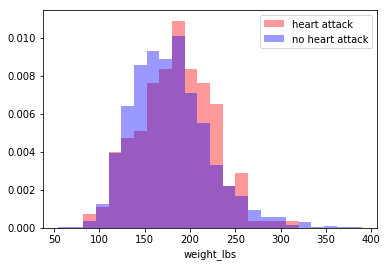

--------------------------------------------------
NULL count: 0
NULL perc: 0.0%


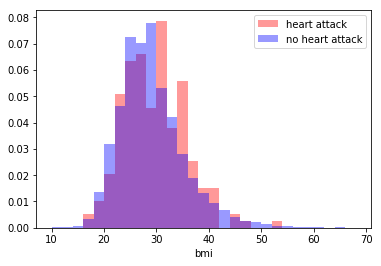

--------------------------------------------------


In [34]:
ha3 = xtest5[xtest5['heart_attack'] == 1]
nha3 = xtest5[xtest5['heart_attack'] == 0]

for iv in cont_ivs2:
    plot_continuous(ha3, nha3, iv, ha_color, nha_color)
    plt.show()
    print('-' * 50)

NULL count: 0
NULL perc: 0.0%


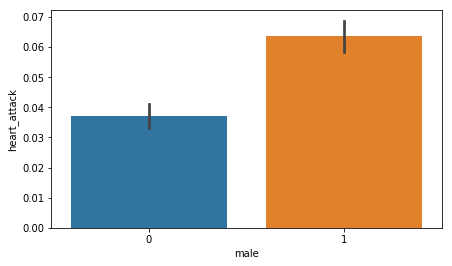

NULL count: 0
NULL perc: 0.0%


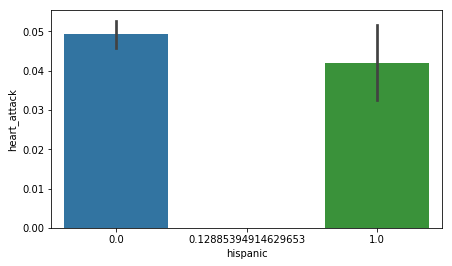

NULL count: 0
NULL perc: 0.0%


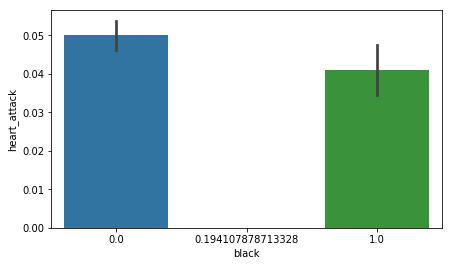

NULL count: 0
NULL perc: 0.0%


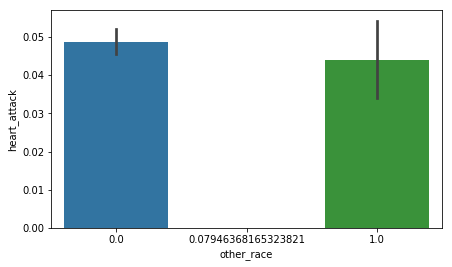

NULL count: 0
NULL perc: 0.0%


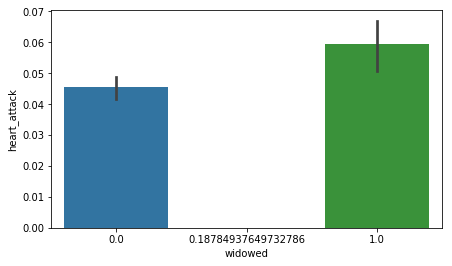

NULL count: 0
NULL perc: 0.0%


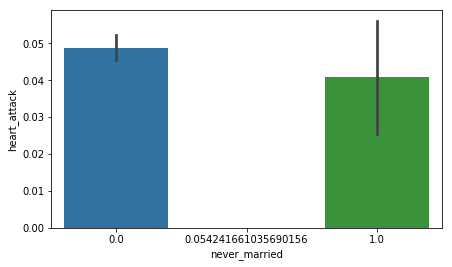

NULL count: 0
NULL perc: 0.0%


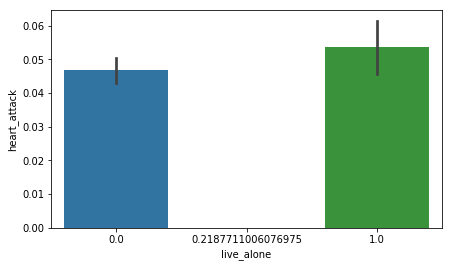

NULL count: 0
NULL perc: 0.0%


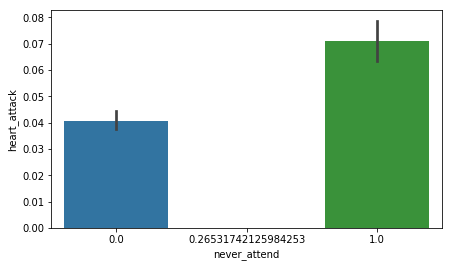

NULL count: 0
NULL perc: 0.0%


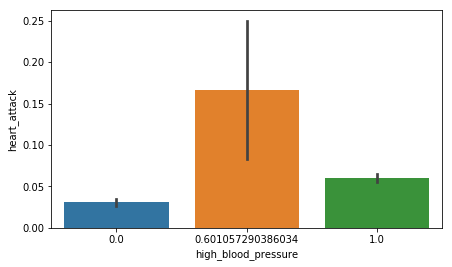

NULL count: 0
NULL perc: 0.0%


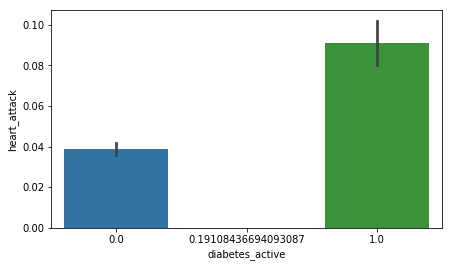

NULL count: 0
NULL perc: 0.0%


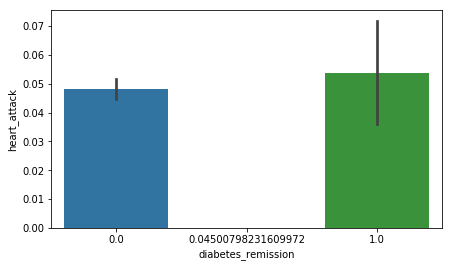

NULL count: 0
NULL perc: 0.0%


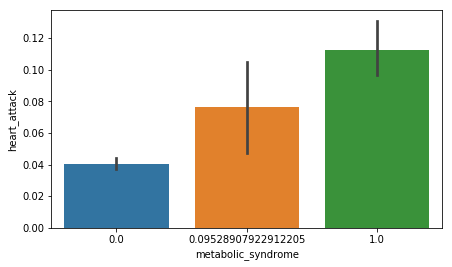

NULL count: 0
NULL perc: 0.0%


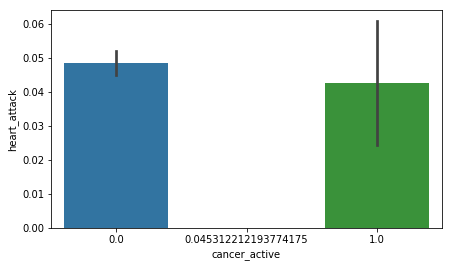

NULL count: 0
NULL perc: 0.0%


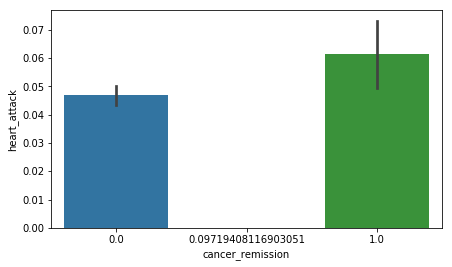

NULL count: 0
NULL perc: 0.0%


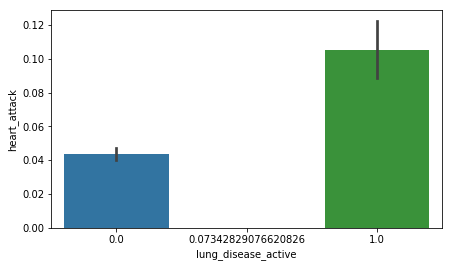

NULL count: 0
NULL perc: 0.0%


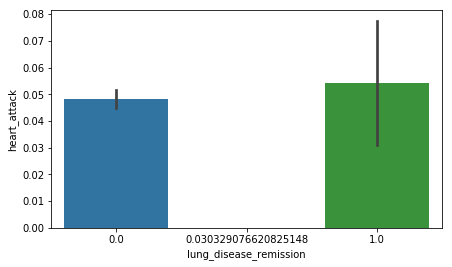

NULL count: 0
NULL perc: 0.0%


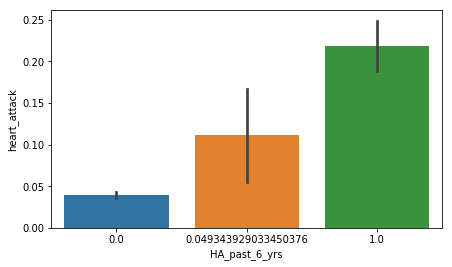

NULL count: 0
NULL perc: 0.0%


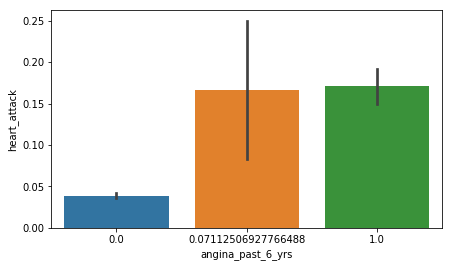

NULL count: 0
NULL perc: 0.0%


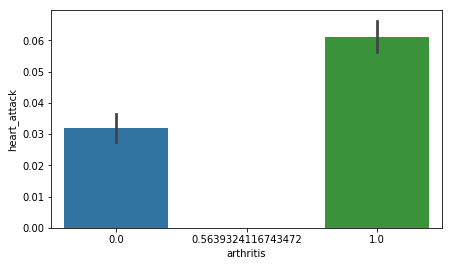

NULL count: 0
NULL perc: 0.0%


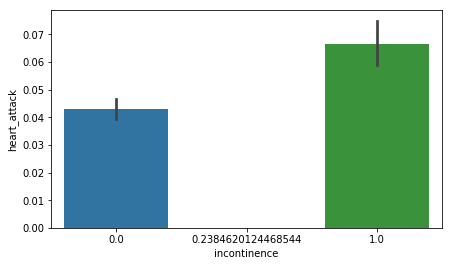

NULL count: 0
NULL perc: 0.0%


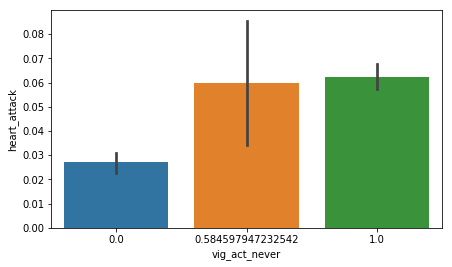

NULL count: 0
NULL perc: 0.0%


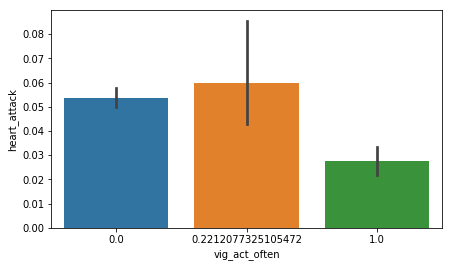

NULL count: 0
NULL perc: 0.0%


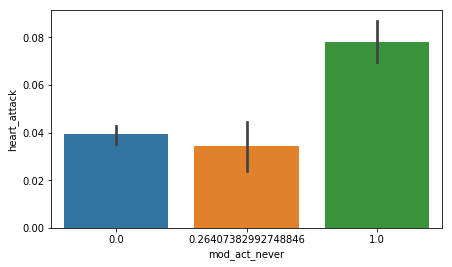

NULL count: 0
NULL perc: 0.0%


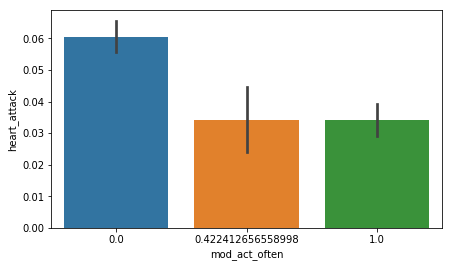

NULL count: 0
NULL perc: 0.0%


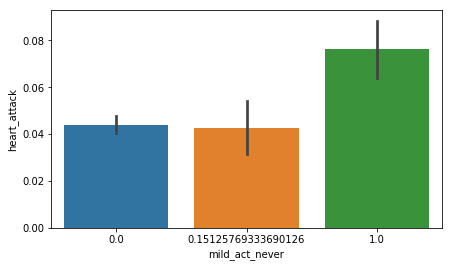

NULL count: 0
NULL perc: 0.0%


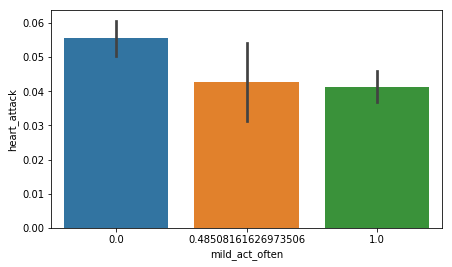

NULL count: 0
NULL perc: 0.0%


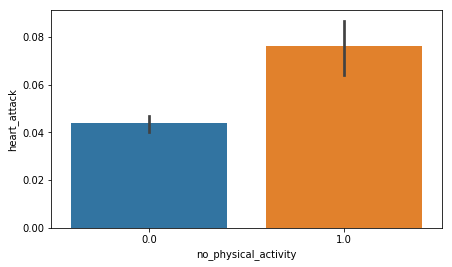

NULL count: 0
NULL perc: 0.0%


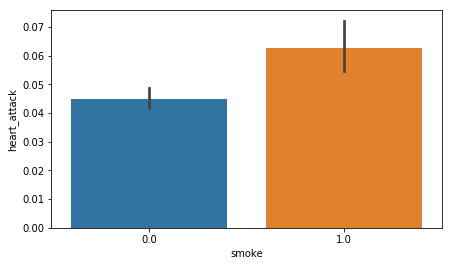

NULL count: 0
NULL perc: 0.0%


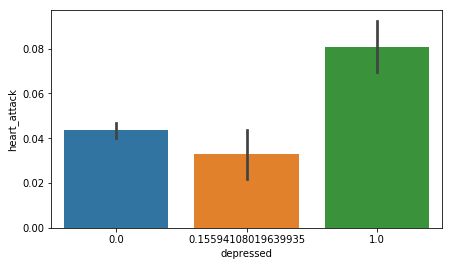

NULL count: 0
NULL perc: 0.0%


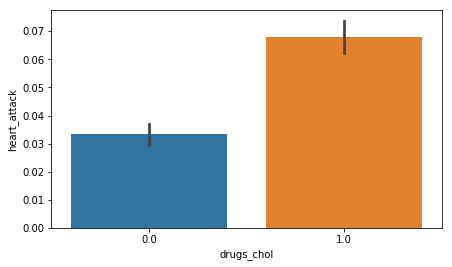

NULL count: 0
NULL perc: 0.0%


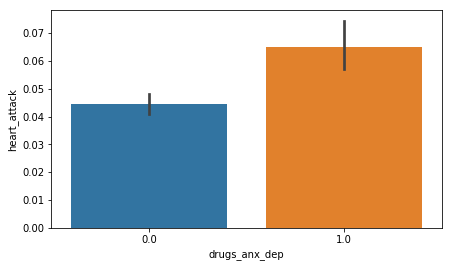

NULL count: 0
NULL perc: 0.0%


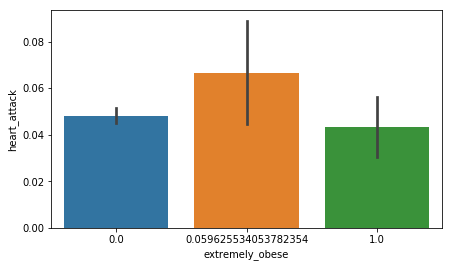

NULL count: 0
NULL perc: 0.0%


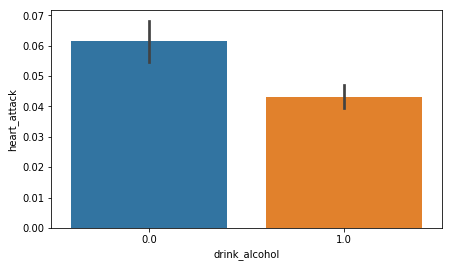

NULL count: 0
NULL perc: 0.0%


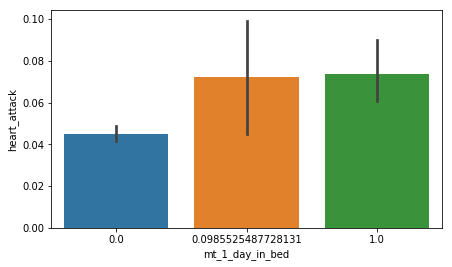

In [35]:
# Bar plots for categorical IVs
for iv in cat_ivs2:
    plt.figure(figsize=(7, 4))
    print('NULL count:', xtest5[iv].isnull().sum())
    print('NULL perc: ' + str(round(xtest5[iv].isnull().sum() / len(xtest5) * 100, 1)) + '%')
    sns.barplot(x=iv, y="heart_attack", data=xtest5, ci=68)
    plt.show()
    print('=' * 100)

<a id="section15"></a>

**15. Determine baseline performance benchmark**

Because only about 5% of respondents had a heart attack in the 6-year window, I could achieve 95% accuracy simply by predicting that NO ONE had a heart attack within the 6 years.

In [36]:
print(xtrain5['heart_attack'].value_counts(dropna=False))
xtrain5['heart_attack'].value_counts(dropna=False) / len(xtrain5)

0    15455
1      845
Name: heart_attack, dtype: int64


0    0.94816
1    0.05184
Name: heart_attack, dtype: float64

In [37]:
print(xtest['heart_attack'].value_counts(dropna=False))
xtest['heart_attack'].value_counts(dropna=False) / len(xtest)

0    3879
1     197
Name: heart_attack, dtype: int64


0    0.951668
1    0.048332
Name: heart_attack, dtype: float64

As expected, I would achieve ~95% accuracy by always predicting no heart attack (0).

However, this approach isn't very useful--it doesn't tell us anything about who may be at risk for a heart attack. 

<a id="section16"></a>

**16. Define model performance metrics**
- To measure the performance of the model, I selected several metrics:
    - **Accuracy**:  most intuitive measure; however, it can be misleading in cases where the outcome we’re trying to predict has unequal proportions of the positive and negative class
        - This is the case in our dataset:  in the training set, 5.2% (845) of the respondents had a heart attack 2010-2016, whereas 94.8% (15,455) did not
            - A similar proportion is found in the test set
        - If we predicted 100% of the respondents did not have a heart attack, we would achieve an accuracy of ~95%, but this wouldn’t provide us with any useful information about who may have a heart attack
        - Therefore, we need other metrics in addition to accuracy
    - **Sensitivity**:  proportion of the positive class (1=heart attack occurrence) that is correctly classified as the positive class
        - If we always predict the non-heart attack outcome, this will be zero, which we do not want
        - Calculated by the `sensitivity` function
    - **Specificity**:  proportion of the negative class (0=no heart attack occurrence) that is correctly classified as the negative class
        - A good predictive model should have an appropriate balance between sensitivity and specificity
            - "Appropriate" is defined by the problem in question and the cost of a false positive versus a false negative
        - Calculated by the `specificity` function
    - **ROC Curve**:  using the output probability scores from the model (the probability of the 1-coded outcome), the true positive rate (TPR) and false positive rate (FPR) are computed for every possible classification threshold and then plotted.  The closer the resulting curve is to the top left corner, the better the classifier.  The closer the curve is to a diagonal line with a slope of 1, the worse (this line is the performance we would expect from randomly guessing the class).
        - Plotted by the `measure_performance` function
    - **Area Under the Curve (AUC)**:  area under the ROC curve.  This ranges from 0 to 1 and is interpreted as the probability that a randomly selected observation with the positive class will have a higher score than a randomly selected observation with the negative class.
- ROC Curve and AUC have the advantage that they are independent of the chosen classification threshold (the threshold over which we would count the output probability as predicting the 1-coded outcome). The accuracy, sensitivity, and specificity could vary based on what classification threshold was chosen, but the ROC curve and AUC will always be the same regardless of the threshold. Therefore, the ROC curve and AUC can be said to give a more complete picture of the performance potential of the model.

In [125]:
# Metrics to track in addition to accuracy
# Source:  http://www.deepideas.net/unbalanced-classes-machine-learning/

# % of positive (1) class that was correctly classified as positive
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

# % of negative (0) class that was correctly classified as negative
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

# Measure the performance of the classifier using several metrics
def measure_performance(actual, pred_scores, threshold=0.5):
    dset = pd.DataFrame({'actual': actual, 'predicted': (pred_scores >= threshold) * 1})
    print("Accuracy:", ((pred_scores >= threshold) * 1 == actual).mean())
    pos = dset[dset['actual'] == 1]
    neg = dset[dset['actual'] == 0]
    print("Sensitivity:", (pos['actual'] == pos['predicted']).mean())
    print("Specificity:", (neg['actual'] == neg['predicted']).mean())
    fpr, tpr, thresholds = metrics.roc_curve(actual, pred_scores)
    print("AUC:", metrics.auc(fpr, tpr))
#     print(metrics.classification_report(actual, (pred_scores >= threshold) * 1))
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
    plt.xlabel('False Positive Rate (1 - specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('(N=' + str(len(actual)) + ')')
    plt.legend()
    plt.show()

<a id="section17"></a>

**17. Fit the logistic regression model**
- The first model tested was logistic regression, which uses a linear decision boundary fit using maximum likelihood estimation to predict the binary outcome
    - This model was fit using the Python StatsModels library
    - I chose the StatsModels implementation over the Scikit-Learn implementation because StatsModels can generate a visually-pleasing table of the model coefficients
- This model used all 39 variables to predict whether the respondent would have a heart attack in the time range 2010-2016
- No regularization was used--the intention of this model was to get a performance baseline using a "plain vanilla" model
- The classification threshold for this model was the standard threshold of 0.5

In [126]:
# Fit logistic regression model and view coefficients
log_reg_mod = sm.Logit(xtrain6['heart_attack'], add_constant(xtrain6[full_ivs]))
log_reg_result = log_reg_mod.fit(method='bfgs')
print(log_reg_result.summary())

         Current function value: 0.179674
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:           heart_attack   No. Observations:                16300
Model:                          Logit   Df Residuals:                    16260
Method:                           MLE   Df Model:                           39
Date:                Sat, 01 Jun 2019   Pseudo R-squ.:                  0.1188
Time:                        22:35:22   Log-Likelihood:                -2928.7
converged:                      False   LL-Null:                       -3323.6
                                        LLR p-value:                1.324e-140
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.2845      0.046    -70.

In [127]:
# Get the logistic regression model probability scores and predictions
try:
    log_reg_pred_scores = log_reg_result.predict(add_constant(xtest6[full_ivs]))
    log_reg_pred = log_reg_pred_scores.round()
except ValueError:
    xtest100 = copy.deepcopy(xtest6)
    xtest100['const'] = 1
    log_reg_pred_scores = log_reg_result.predict(add_constant(xtest100[full_ivs + ['const']]))
    log_reg_pred = log_reg_pred_scores.round()

Accuracy: 0.9514229636898921
Sensitivity: 0.015228426395939087
Specificity: 0.9989688063934004
AUC: 0.7504367523682774


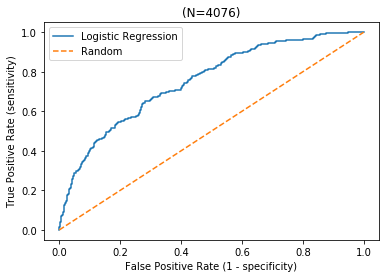

In [128]:
# Measure performance with a classification threshold of 0.5
measure_performance(xtest6['heart_attack'], log_reg_pred_scores, threshold=0.5)

- Performance metrics for this model (evaluated on the test set) using a 0.5 classification threshold:
    - Accuracy:  95.1%
    - Sensitivity:  1.5%
    - Specificity:  99.9%
    - AUC:  0.750
- This model predicted almost all respondents would not have a heart attack--using this classification threshold, it is practically useless for detecting heart attacks

Accuracy: 0.7757605495583906
Sensitivity: 0.5532994923857868
Specificity: 0.7870585202371745
AUC: 0.7504367523682774


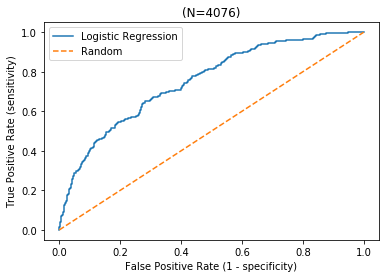

In [129]:
# Measure performance with a classification threshold of 0.06
measure_performance(xtest6['heart_attack'], log_reg_pred_scores, threshold=0.06)

- However, if I adjust the classification threshold, I can get a better balance between sensitivity and specificity
- When the threshold is reduced to 0.06, the sensitivity is 55%, the specificity is 79%, and the accuracy is 78%, which is more reasonable for this task

<a id="section18"></a>

**18. Select a neural network model**
- Multiple neural network configurations were considered and tested for predicting heart attack incidence
    - Models were created and tested using the Python Keras library
    - The model structure was defined and tested using the `create_model` function
- Each model was fit using a 80/20 random training/validation split
- The randomly selected validation set (20%) was used to track the performance of the model in terms of accuracy, sensitivity, and specificity during the training process
- The following deep learning model parameters were varied and tested in an attempt to find the optimal model for this predictive problem:
    - **Number of layers**:  the more layers, the higher the flexibility of the model (lower bias, higher variance)
        - Tested: 1, 2, 3, 4, 5
    - **Neurons per layer**:  the more neurons, the lower the bias and the higher the variance
        - Tested: 10-10,000 (manually-selected intervals)
    - **Activation functions in each layer**:  function performed on the linear combination of weighted output from the previous layer
        - Tested: ReLU, sigmoid
        - Note: since this is a classification problem, the final (output) layer must have a sigmoid activation to convert the linear combination of outputs into a probability
    - **Loss function**:  the optimization function attempts to select neural network weights that will minimize this quanitity
        - Tested: binary cross-entropy
    - **Optimization algorithm**:  algorithm used to select the neural network weights that minimize the cost function
        - Tested: SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
    - **Regularization**:  increasing regularization reduces the magnitude of the neural network weights, which increases bias and reduces variance
        - Tested: l1 and l2, 0.001-0.9
    - **Dropout**:  increasing dropout increases the number of layer outputs that are dropped, reducing model complexity, which increases bias and reduces variance
        - Tested: 10%, 25%, 50%, 75%, 90%
    - **Weight initialization**:  initial values assigned to the neural network weights 
        - Tested: zeros, normal
    - **Training epochs**:  too few epochs and the bias will be excessively high (underfit); too many epochs and the variance will be excessively high (overfit).  The goal is to find the "sweet spot" (explored further below).
        - Tested: 1-50 (manually-selected intervals)
    - **Batch size**: number of observations used for each training pass; the optimal number can be different for each dataset
        - Tested: 10-100 (manually-selected intervals)
    - **Learning rate**:  the amount the weights can be updated in each training pass
        - Tested: 0.001
    - **Class weights**:  
        - 0 (non-heart attack):  1
        - 1 (heart attack): 1-10,000
- Since this was a general predictive problem that didn’t involve images or text, only densely-connected layers were used in the candidate models
- Due to constraints in time and knowledge about the Keras library, different configurations were manually selected and tested
    - I attempted to select a good variety of different configurations, by I cannot claim to have tried an exhaustive array of posibilities
    - If more time was available, an (automated) exhaustive grid search of possible combinations might have been performed
- Due to the highly unbalanced nature of the classes, the models had a tendency to ignore the positive (heart attack) cases when using a 0.5 classification threshold.  To cause the models to “pay more attention” to the heart attack cases, and thus increase sensitivity, a higher weight was assigned to these cases. (I also could have just lowered the classification threshold I was using, like I did with logistic regression above).
- The optimal model was defined as the one that achieved respectable performance in identifying heart attack cases, while at the same time minimizing false positives.
    - Over time, given the constraints in the number of models I was able to consider and the quality of the predictor data, I determined that a reasonable goal was a sensitivity of 50% and a specificity of 75%.  These thresholds resulted in a model that was able to identify a majority of heart attack victims without too many false positives.
- Once a model that could meet these performance thresholds was identified, I determined the optimal number of training epochs by training 10 such models for 50 epochs with different random 20% validation sets each time, plotted the average accuracy, sensitivity, and specificity with respect to epoch, and selected the optimal number of epochs as the number where the above performance thresholds were met while maximizing accuracy.

In [43]:
xtrain7 = xtrain6.sample(frac=1, random_state=1)

In [130]:
# Experiment with different model configurations using a 80-20 train-validation split

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=39, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, input_dim=39, activation='relu', kernel_initializer='zeros',
#                    kernel_regularizer=regularizers.l2(0.)))
#     model.add(Dense(10, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.75))
#     model.add(Dense(100, activation='relu', kernel_initializer='zeros',
#                    kernel_regularizer=regularizers.l2(0.5)))
#     model.add(Dense(10, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.75))
#     model.add(Dense(100, activation='relu', kernel_initializer='zeros',
#                    kernel_regularizer=regularizers.l2(0.5)))
#     model.add(Dense(10, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.75))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal',
#                    kernel_regularizer=regularizers.l1(0.5)))
#     model.add(Dense(10, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.75))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal',
#                    kernel_regularizer=regularizers.l1(0.5)))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.9))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.9))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.9))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.9))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.9))
#     model.add(Dense(100, activation='relu', kernel_initializer='normal'))
#     model.add(Dropout(0.9))



    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', sensitivity, specificity])
    return model

modelx = create_model()
histx = modelx.fit(x=xtrain7[full_ivs], y=xtrain7['heart_attack'], batch_size=100, epochs=5, 
                   class_weight={0: 1.0, 1: 15.0}, verbose=1, validation_split=0.2)

# plt.plot(histx.history['val_acc'], label='accuracy')
# plt.plot(histx.history['val_sensitivity'], label='sensitivity')
# plt.plot(histx.history['val_specificity'], label='specificity')
# plt.xlabel('epoch')
# plt.legend()
# plt.show()

Train on 13040 samples, validate on 3260 samples
Epoch 1/5
13040/13040 [==============================] - 1s 98us/step - loss: 1.0982 - acc: 0.7592 - sensitivity: 0.4281 - specificity: 0.7766 - val_loss: 1.1126 - val_acc: 0.7475 - val_sensitivity: 0.5913 - val_specificity: 0.7578
Epoch 2/5
13040/13040 [==============================] - 0s 16us/step - loss: 1.0031 - acc: 0.7620 - sensitivity: 0.5494 - specificity: 0.7722 - val_loss: 1.0804 - val_acc: 0.7773 - val_sensitivity: 0.5489 - val_specificity: 0.7922
Epoch 3/5
13040/13040 [==============================] - 0s 16us/step - loss: 0.9778 - acc: 0.7936 - sensitivity: 0.5403 - specificity: 0.8068 - val_loss: 1.0763 - val_acc: 0.7761 - val_sensitivity: 0.5602 - val_specificity: 0.7903
Epoch 4/5
13040/13040 [==============================] - 0s 16us/step - loss: 0.9650 - acc: 0.7946 - sensitivity: 0.5457 - specificity: 0.8068 - val_loss: 1.0798 - val_acc: 0.7770 - val_sensitivity: 0.5589 - val_specificity: 0.7914
Epoch 5/5
13040/13040 [

In [45]:
# Fit the model with the above parameters 10 times and get the validation error each time
metric_log = {}

for i in range(10):
    print(i)
    modelx = create_model()
    histx = modelx.fit(x=xtrain7[full_ivs], y=xtrain7['heart_attack'], batch_size=100, epochs=50, 
                       class_weight={0: 1.0, 1: 15.0}, verbose=0, validation_split=0.2)

    metric_log[i] = {
        'val_acc': histx.history['val_acc'],
        'val_sensitivity': histx.history['val_sensitivity'],
        'val_specificity': histx.history['val_specificity'],
    }

0
1
2
3
4
5
6
7
8
9


In [46]:
# Combine the validation data for each of the 10 models in a way that can be analyzed and plotted
ml = pd.DataFrame({'val_acc_0': metric_log[0]['val_acc'], 'val_sensitivity_0': metric_log[0]['val_sensitivity'], 'val_specificity_0': metric_log[0]['val_specificity']})
for mod_num, mod_dat in metric_log.items():
    if mod_num != 0:
        for sec, dat in mod_dat.items():
            ml[sec + '_' + str(mod_num)] = dat
        
        
ml.head()

,val_acc_0,val_sensitivity_0,val_specificity_0,val_acc_1,val_sensitivity_1,val_specificity_1,val_acc_2,val_sensitivity_2,val_specificity_2,val_acc_3,...,val_specificity_6,val_acc_7,val_sensitivity_7,val_specificity_7,val_acc_8,val_sensitivity_8,val_specificity_8,val_acc_9,val_sensitivity_9,val_specificity_9
0,0.740491,0.594617,0.750695,0.733129,0.629066,0.740706,0.738037,0.585269,0.748027,0.736810,...,0.773764,0.737423,0.628360,0.744501,0.699387,0.645985,0.703356,0.725767,0.609066,0.734165
1,0.792025,0.546584,0.809223,0.771166,0.561386,0.785729,0.781902,0.530261,0.798754,0.769325,...,0.775585,0.784356,0.547863,0.799591,0.751840,0.606145,0.762172,0.738650,0.590308,0.748637
2,0.783129,0.531758,0.800228,0.779448,0.560619,0.794249,0.776687,0.535994,0.792314,0.762883,...,0.784247,0.773313,0.551879,0.787549,0.776380,0.539610,0.791612,0.768098,0.544905,0.782492
3,0.783742,0.536725,0.800227,0.782822,0.546183,0.798222,0.785890,0.539317,0.802189,0.765031,...,0.797529,0.777607,0.543699,0.792575,0.759202,0.564003,0.771956,0.752761,0.578769,0.763943
4,0.779448,0.539354,0.795357,0.770552,0.579268,0.783140,0.793252,0.508643,0.811354,0.771779,...,0.790036,0.773926,0.540084,0.789247,0.763497,0.553048,0.776538,0.780061,0.532817,0.795605


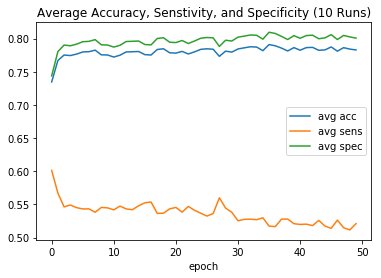

In [47]:
# Plot the validation accuracy, sensitivity, and specificity with respect to epoch
acc_col = [col for col in ml.columns if 'acc' in col]
sensitivity_col = [col for col in ml.columns if 'sensitivity' in col]
specificity_col = [col for col in ml.columns if 'specificity' in col]

acc_avg = ml[acc_col].mean(axis=1)
sensitivity_avg = ml[sensitivity_col].mean(axis=1)
specificity_avg = ml[specificity_col].mean(axis=1)

plt.plot(acc_avg, label='avg acc')
plt.plot(sensitivity_avg, label='avg sens')
plt.plot(specificity_avg, label='avg spec')
plt.xlabel('epoch')
plt.title('Average Accuracy, Senstivity, and Specificity (10 Runs)')
plt.legend()
plt.show()

In [48]:
pd.DataFrame({'acc_avg': acc_avg, 'sens_avg': sensitivity_avg, 'spec_avg': specificity_avg})

,acc_avg,sens_avg,spec_avg
0,0.734663,0.601337,0.743761
1,0.766933,0.567179,0.780419
2,0.775245,0.546353,0.790265
3,0.774448,0.549248,0.789171
4,0.776595,0.545220,0.791565
5,0.779847,0.543265,0.795275
6,0.780276,0.543387,0.795841
7,0.782546,0.538289,0.798408
8,0.775521,0.545584,0.790605
9,0.775307,0.544884,0.790287


- Using the methodology described above, I selected a neural network with the following characteristics:
    - **Number of layers**:  3
        - **Layer 1**:  100 neurons, ReLU activation
        - **Layer 2**:  10 neurons, ReLU activation
        - **Layer 3 (output layer)**:  1 neuron, sigmoid activation
    - **Loss function**:  binary cross-entropy
    - **Optimization algorithm**:  Adam
    - **Regularization**:  none
    - **Dropout**:  none
    - **Weight initialization**:  normal (Keras default mean and standard deviation)
    - **Training epochs**:  5
    - **Batch size**:  100
    - **Learning rate**:  0.001
    - **Class weights**:  
        - 0 (non-heart attack):  1
        - 1 (heart attack): 15

This model is defined using the `create_final_model` function

In [49]:
# Create the final model and train it on the full training set
def create_final_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=39, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', sensitivity, specificity])
    return model

final_model = create_final_model()
hist_final = final_model.fit(x=xtrain7[full_ivs], y=xtrain7['heart_attack'], batch_size=100, epochs=5, 
                   class_weight={0: 1.0, 1: 15.0}, verbose=1)

Epoch 1/5
16300/16300 [==============================] - 1s 62us/step - loss: 1.0792 - acc: 0.6853 - sensitivity: 0.5557 - specificity: 0.6915
Epoch 2/5
16300/16300 [==============================] - 0s 19us/step - loss: 0.9952 - acc: 0.7703 - sensitivity: 0.5659 - specificity: 0.7811
Epoch 3/5
16300/16300 [==============================] - 0s 17us/step - loss: 0.9759 - acc: 0.7724 - sensitivity: 0.6139 - specificity: 0.7818
Epoch 4/5
16300/16300 [==============================] - 0s 17us/step - loss: 0.9614 - acc: 0.7725 - sensitivity: 0.6210 - specificity: 0.7809
Epoch 5/5
16300/16300 [==============================] - 0s 17us/step - loss: 0.9477 - acc: 0.7644 - sensitivity: 0.6188 - specificity: 0.7712


- Neural network performance on the test set:
    - Accuracy:  77.8%
    - Sensitivity:  56%
    - Specificity:  79%
    - AUC:  0.757

In [50]:
# Measure the performance of the selected model on the test data
final_pred = final_model.predict(xtest6[full_ivs])
final_pred

array([[0.17110196],
       [0.24816263],
       [0.19694963],
       ...,
       [0.14767486],
       [0.23027857],
       [0.31311777]], dtype=float32)

Accuracy: 0.7485279685966634
Sensitivity: 0.5989847715736041
Specificity: 0.7561227120391854
AUC: 0.7585515132242728


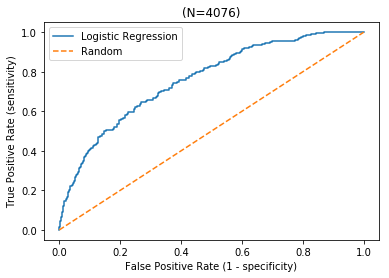

In [132]:
measure_performance(xtest6['heart_attack'], final_pred.reshape(1, -1)[0])

<a id="section19"></a>

**19. Select a gradient boosting machine model**

GBM is a tree-based method that utilizes multiple "weak" decision tree models that are added together. The models are "weak" because each is relatively simple--each only has one or a few splits.  The models are fit sequentially, with the first being fit to the training data, and each subsequent model being fit on the residuals of the previous model.  Using this methodology, each subsequent model can be said to correct for some of the mistakes of the prior model.  All of the models are then added together, resulting in a combined model with much better performance than any of the individual models.  

GBMs have a number of tunable hyper-parameters. Below is a description of each and the values I tested via exhaustive grid search using 3-fold cross validation:
- **loss**:  Scikit-Learn implements two options by default:
    - "deviance": "The negative binomial log-likelihood loss function for binary classification (provides probability estimates). The initial model is given by the log odds-ratio."  This is the same loss function as used in logistic regression.
    - "exponential": "The same loss function as AdaBoostClassifier. Less robust to mislabeled examples than 'deviance'; can only be used for binary classification."
- **learning_rate**: ranges 0-1, controls how fast the contribution of additional models beyond the baseline model is reduced. Increasing this decreases bias while increasing variance.
    - Tested: 0.05, 0.1, 0.2
- **n_estimators**: number of "weak" models added together.  Increasing this number decreases bias while increasing variance.
    - Tested: 20, 50, 100, 150
- **subsample**: fraction of training samples used for fitting each model. Decreasing this fraction will increase bias while reducing variance.
    - Tested: 0.7, 1.0
- **min_samples_split**: minimum number of samples that can be included in each tree split. Increasing this number will increase bias while reducing variance.
    - Tested: 2, 5, 10
- **max_depth**: depth of each tree sub-model. Increasing this number will decrease bias and increase variance. The higher this number, the greater the complexity of variable interactions this model can account for.
    - Tested: 2, 3, 5
- **max_features**: number/fraction of features (predictor variables) to use to fit each sub-model. Decreasing the number so it is less than the full set of features will increase bias and reduce variance.
    - Tested: None (all features), "sqrt" (random subset of features equal to the square root of the total number of features)
    
The optimal GBM model was selected as the one with the highest average validation AUC.

In [69]:
# Perform the exhaustive grid search over the 864 possible hyperparameter configurations
parameters = {
    'loss': ['deviance', 'exponential'], 
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [20, 50, 100, 150],
    'subsample': [0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'max_depth': [2, 3, 5],
    'max_features': [None, 'sqrt']
}
gbm = GradientBoostingClassifier()
clf = GridSearchCV(gbm, parameters, cv=3, scoring='roc_auc')
gmb_results = clf.fit(xtrain7[full_ivs], xtrain7['heart_attack'])
gmb_results

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['deviance', 'exponential'], 'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [20, 50, 100, 150], 'subsample': [0.7, 1.0], 'min_samples_split': [2, 5, 10], 'max_depth': [2, 3, 5], 'max_features': [None, 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [83]:
# Visualize the results of the exhaustive grid search
gmb_results.cv_results_
rt = pd.DataFrame(gmb_results.cv_results_['params'])
rt['mean_test_score'] = gmb_results.cv_results_['mean_test_score']
rt['std_test_score'] = gmb_results.cv_results_['std_test_score']
rt['SEM'] = (rt['std_test_score'] / (np.sqrt(np.pi) / 2)) / np.sqrt(3) # corrected for small sample size (see https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation)
rt['rank_test_score'] = gmb_results.cv_results_['rank_test_score']
print(len(rt))
rt.head()

864


,learning_rate,loss,max_depth,max_features,min_samples_split,n_estimators,subsample,mean_test_score,std_test_score,SEM,rank_test_score
0,0.05,deviance,2,None,2,20,0.7,0.723290,0.013796,0.008988,707
1,0.05,deviance,2,None,2,20,1.0,0.721463,0.012432,0.008099,723
2,0.05,deviance,2,None,2,50,0.7,0.739141,0.009333,0.006080,407
3,0.05,deviance,2,None,2,50,1.0,0.739813,0.008347,0.005438,376
4,0.05,deviance,2,None,2,100,0.7,0.745582,0.006542,0.004262,155


In [85]:
# View the top 5 scoring models
rt[rt['rank_test_score'] < 6].sort_values('rank_test_score')

,learning_rate,loss,max_depth,max_features,min_samples_split,n_estimators,subsample,mean_test_score,std_test_score,SEM,rank_test_score
166,0.05,exponential,2,None,10,150,0.7,0.751384,0.006145,0.004004,1
237,0.05,exponential,3,sqrt,10,100,1.0,0.750598,0.005759,0.003752,2
191,0.05,exponential,2,sqrt,10,150,1.0,0.750346,0.004527,0.002949,3
469,0.10,exponential,2,sqrt,5,100,1.0,0.750031,0.005903,0.003845,4
477,0.10,exponential,2,sqrt,10,100,1.0,0.749957,0.005024,0.003273,5


The model with the highest validation AUC has the following hyper-parameters:
- **loss**: exponential
- **learning_rate**: 0.05
- **n_estimators**: 150
- **subsample**: 0.7
- **min_samples_split**: 10
- **max_depth**: 2
- **max_features**: None (include all variables)

In [88]:
# Fit the selected GBM model
gbm_final = GradientBoostingClassifier(
    loss='exponential',
    learning_rate=0.05,
    n_estimators=150,
    subsample=0.7,
    min_samples_split=10,
    max_depth=2,
    max_features=None
)

gbm_final_result = gbm_final.fit(xtrain7[full_ivs], xtrain7['heart_attack'])

In [95]:
# Measure the performance of the selected model on the test data
gbm_final_pred = gbm_final_result.predict_proba(xtest6[full_ivs])
gbm_final_pred = np.array([v[1] for v in gbm_final_pred])
gbm_final_pred

array([0.02655339, 0.01501548, 0.02005024, ..., 0.02291342, 0.02393341,
       0.03377667])

Accuracy: 0.7737978410206084
Sensitivity: 0.5583756345177665
Specificity: 0.7847383346223253
AUC: 0.7615227379498877


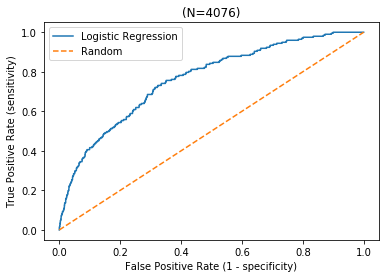

In [131]:
measure_performance(xtest6['heart_attack'], gbm_final_pred, threshold=0.055)

<a id="section20"></a>

**20. Test the selected models using the test set**

After fitting, all 3 models were evaluated using the test set.

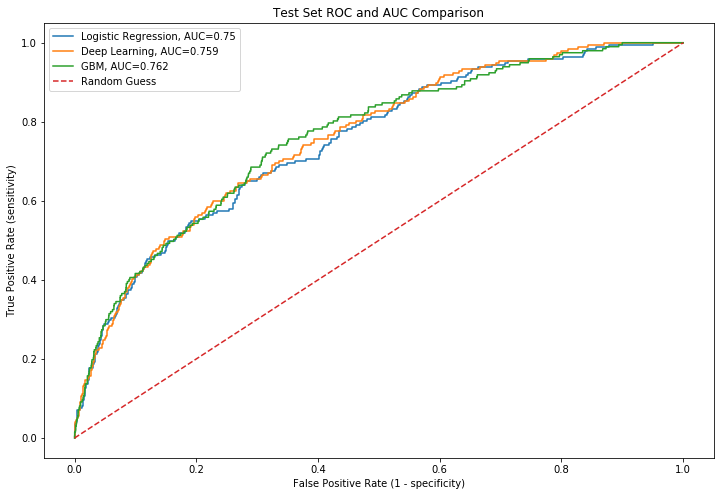

In [111]:
# Compare the three final models
fpr_log_reg, tpr_log_reg, thresholds_log_reg = metrics.roc_curve(xtest6['heart_attack'], log_reg_pred_scores)
auc_log_reg = metrics.auc(fpr_log_reg, tpr_log_reg)

fpr_dl, tpr_dl, thresholds_dl = metrics.roc_curve(xtest6['heart_attack'], final_pred.reshape(1, -1)[0])
auc_dl = metrics.auc(fpr_dl, tpr_dl)

fpr_gbm, tpr_gbm, thresholds_gbm = metrics.roc_curve(xtest6['heart_attack'], gbm_final_pred)
auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)

plt.figure(figsize=(12, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression, AUC=' + str(round(auc_log_reg, 3)))
plt.plot(fpr_dl, tpr_dl, label='Deep Learning, AUC=' + str(round(auc_dl, 3)))
plt.plot(fpr_gbm, tpr_gbm, label='GBM, AUC=' + str(round(auc_gbm, 3)))
plt.plot([0, 1], [0, 1], label='Random Guess', linestyle='--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('Test Set ROC and AUC Comparison')
plt.legend()
plt.show()

#### Conclusions

When using the proper classification threshold, all three models achieved performance within the desired tolerance of > 50% sensitivity and > 75% specificity. The deep learning and GBM models had AUC that was very slightly higher  (~0.01) than the logistic regression model, but it was by such a small amount that it was not practically significant. This demonstrate that a more sophisticated model does not always perform better. Several options could be explored for improving the performance of these models. The most obvious option would be to find more and better predictor predictor variables.  Additionally, exhaustive grid search could be implemented for the deep learning model to explore a larger part of the hyper-parameter space, and the grid search already implemented for the GBM could be expanded.  I could also explore the current predictor variables further to determine if there are any multi-variable interactions I should account for.  Lastly, I could try removing the variables that had no apparent correlation with the outcome, since these provide no useful information.  Overall, I am pleased with the results of this analysis, but more work remains to be done in order to improve the quality of the models. 